# Etude d'opportunité - Culture Informatique en France

Auteur : [Maximo Rose](https://maximorose.eu/)

Licence : [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

-------------------------------------------------------------------------------------



J'ai choisi de conserver le format de Notebook parce qu'il mélange code, texte, graphiques, etc. C'est un bon medium pour commencer a apprécier le code. Vous verrez qu'en deux lignes presque comprehensibles, je fais la majorité des actions. 

Cette page alternera donc entre commentaires d'analyses des résultats, codes et graphiques. Dans les blocs de code, n'hésitez pas a lire le texte en vert. Ce sont des commentaires. Je ne les écris pas pour la machine, je les écris pour celles et ceux qui liraient le code, donc pour vous ! (et pour futur moi, qui aura oublié ce que moi passé voulait faire)



In [1]:
# Ici, j'importe des fonctions que j'ai définies ailleurs, afin de proposer un NoteBook avec assez peu de code
import mbr_typeform as mbrtf
import mbr_plots as mbrpl


# Charger en mémoire la structure du questionnaires et les réponses associées
tfs = mbrtf.mbr_typeFrom(formid='YvBfAdHB')
# A partir de cette fonction, on récupère en mémoire : Le tableau de toutes les réponses, le nombre de réponses, et la liste des groupes de questions du questionnaire
form_responses = tfs.form_results
nb_responses = form_responses.shape[0]
form_groups = tfs.form_groups


# Là, j'initialise des fonctions graphiques que j'ai faites, car j'aime bien avoir toujours les mêmes styles dans mes graphiques
myfig = mbrpl.plots_mbr_tf()

Group 1 : Apprenons à  se connaître
Group 2 : Votre rapport au numérique...
Group 3 : Enseignement et éducation...
Group 4 : L'offre culturelle numérique
Group 5 : Les sujets qui vous interessent
Group 6 : Pour conclure


-------------------------------------------------------------------------

# GROUP 1 : Apprenons à  se connaître 

-------------------------------------------------------------------------

Groupe index (gidx) = 0

## 1.A - Vous êtes ...

- id : oYqnhtesJuF5
- Single Choice

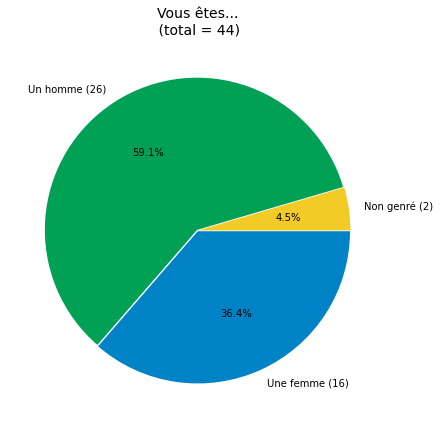

In [2]:
# Retourne le titre de la question, la liste des options possibles, la liste des résultats associés a chaque option (un tableau de résultats par option possible)
qsex_title, sex_lbls, sex_dtf = tfs.get_results(gidx=0,qid='oYqnhtesJuF5')
# Les afficher sous forme de camembert
myfig.plot_mbr_camembert(qtitle = qsex_title, list_labels = sex_lbls, list_dtfs = sex_dtf)

## Bilan

S'il y a peu d'individus qui se définissent non genrées, il y en a tout de même une multitude et je suis très heureux que iel soient representé.e.s.

(pas sûr que je parvienne à tout tapper en inclusif, désolé d'avance)

## 1.B - Quel est votre âge ?

- id = BZsILkKYGzKQ 
- Single choice

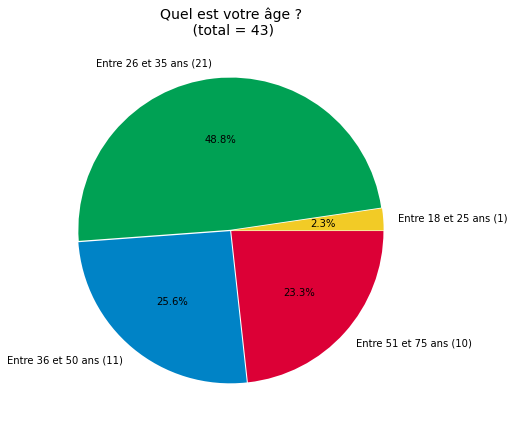

In [3]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associés a chaque option (un tableau de résultats par option possible)
qage_label, age_lbls, age_dtf = tfs.get_results(gidx=0,qid='BZsILkKYGzKQ')
# Les afficher sous forme de camembert
myfig.plot_mbr_camembert(qtitle = qage_label, list_labels = age_lbls, list_dtfs = age_dtf)

## Bilan

On a certainement une majorité de 26 - 35 ans parce que c'est l'âge de la plupart des gens que j'ai contacté directement, et qui ont eu la gentillesse de diffuser ce questionnaire autour d'eux.

## 1.C - Vivez-vous en France ? 

- id = M2yM4x72oiV3
- Single Choice

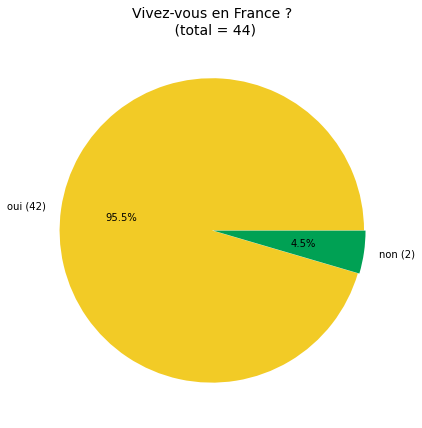

In [4]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
qFrance, France_lbls, france_yn_dtf = tfs.get_results(gidx=0,qid='M2yM4x72oiV3')
# Les afficher sous forme de camembert
myfig.plot_mbr_camembert(qtitle = qFrance, list_labels = France_lbls, list_dtfs = france_yn_dtf)


## Bilan 

Le projet étant celui d'une plateforme web, les réponses étrangères sont aussi à considérer, car la plateforme serait accessible n'importe où, où le Réseau est accessible

## 1.D - Quel fut votre dernier diplome ? 

- id = 8WoLUtHsWKKJ
- Single Choice

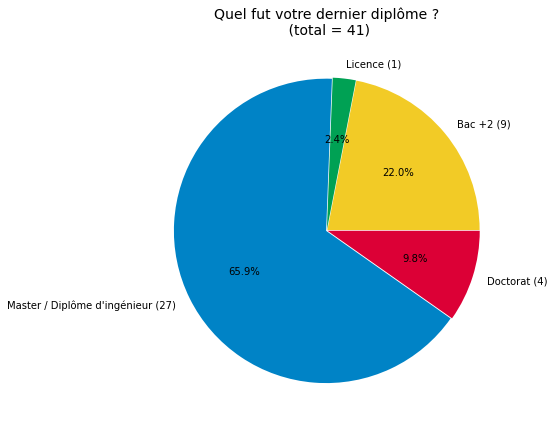

In [5]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
qdiplome, dpl_labels, diplome_dtfs = tfs.get_results(gidx=0,qid='8WoLUtHsWKKJ')
# Les afficher sous forme de camembert
myfig.plot_mbr_camembert(qtitle = qdiplome, list_labels = dpl_labels, list_dtfs = diplome_dtfs)

## Bilan :

La propension de Master et Diplome d'ingenieur est due au biais de mes connaissances directes trop peu diversifiées.

Il est à noter, qu'en 2014 23% des francais disposaient de Bac+5 ou plus (source : [INSEE](https://www.insee.fr/fr/statistiques/4238409?sommaire=4238781))

Les resultats que vous allez lire sont donc ceux d'une population dites éduquées, puisque plus de 70% des répondant.e.s ont plus de Bac+5.

## 1.E - Travaillez-vous dans le secteur public ? 

- id = vMmUInJ5B4C9
- Single Choice


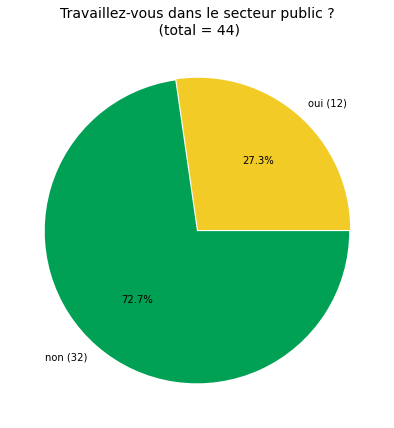

In [6]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
qPublic, public_lbls, public_yn_dtf = tfs.get_results(gidx=0,qid='vMmUInJ5B4C9')
# Les afficher sous forme de camembert
myfig.plot_mbr_camembert(qtitle = qPublic, list_labels = public_lbls, list_dtfs = public_yn_dtf)

## Bilan :

Cette question a surtout pour vocation de servir, potentiellement, à filtrer les réponses des derniers groupes. Je soupçonne que la connaissance des institutions existantes et le visionnage des vidéos culturelles sont influencés par le fait qu'on travaille ou non dans le public.

## 1.F - Travaillez-vous dans le secteur culturel ? 

- id = 4dOyMP97omhJ 
- Single choice

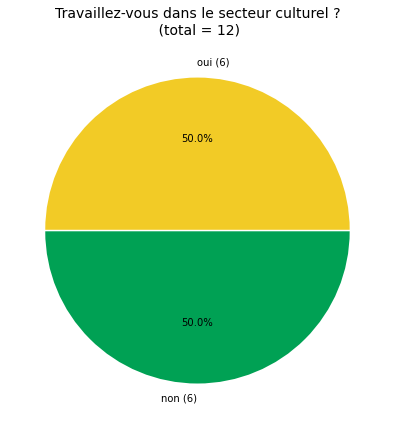

In [7]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
qCulture, culture_lbls, culture_yn_dtf = tfs.get_results(gidx=0,qid='4dOyMP97omhJ')
# Les afficher sous forme de camembert
myfig.plot_mbr_camembert(qtitle = qCulture, list_labels = culture_lbls, list_dtfs = culture_yn_dtf)

## Bilan :

Même bilan qu'à la question précédente

## 1.G - Quelle est votre spécialité ?

- id = OnnjlaZauNJ0 
- Single choice

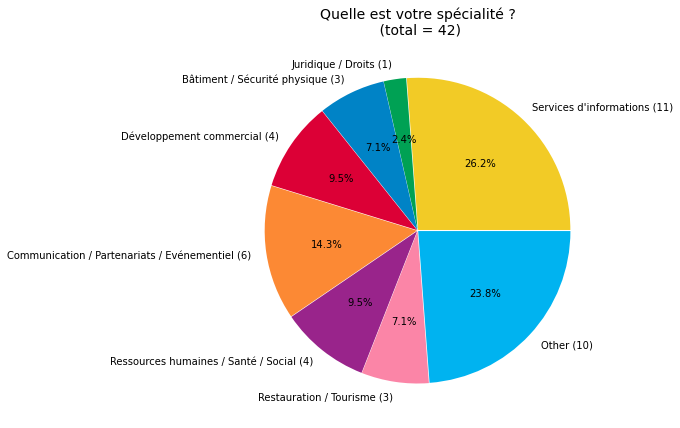

In [8]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
qScpecialite, spec_lbls, spec_dtfs = tfs.get_results(gidx=0,qid='OnnjlaZauNJ0')
# Les afficher sous forme de camembert
myfig.plot_mbr_camembert(qtitle = qScpecialite, list_labels = spec_lbls, list_dtfs = spec_dtfs)

## Bilan :

On a un peu de tout, mais une trop forte part "d'autres". Cela veut dire que j'ai clairement oublié certaines catégories d'activités. Peut-être aurais-je pu me contenter de "Travaillez vous dans l'informatique ?", car c'est finalement surtout de cette réponse qui sera utiles.

Mais à l'avenir, il me faudra au moins penser à l'artisanat et l'éducation.

### Afficher les Other, pour voir ce que j'ai oublie

In [9]:
spec_dtfs[-1][spec_lbls[-1]].head(10)

0                       Artisan
4                         B-C-G
10                    artisanat
12      ingénieur retraité cnrs
13             Industrie pharma
20         Assistanat direction
23                    Éducation
24    Conseil en secteur public
32              Marche de l'art
35        technique, ingéniérie
Name: Other, dtype: object

----------------------------------------------------

#  GROUP 2 - Votre rapport au numérique 

--------------------------------------------------

- Group index = 1

## 2.A - Quand utilisez-vous le plus souvent les outils numériques ? 

- id =  EyykV9VMHRBS
- Single choice

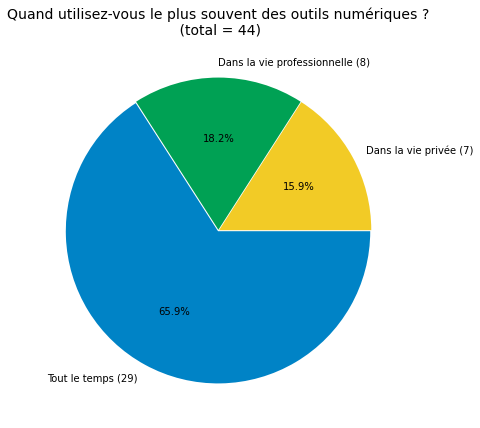

In [10]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
qtimetoIT, it_time_lbls, it_time_dtf = tfs.get_results(gidx=1,qid='EyykV9VMHRBS')
# Les afficher sous forme de camembert
myfig.plot_mbr_camembert(qtitle = qtimetoIT, list_labels = it_time_lbls, list_dtfs = it_time_dtf)

## Bilan :

L'informatique est absolument inévitable. La plupart des gens l'utilise constamment, et personne n'a choisi l'option "le moins possible", pourtant possible. C'est un signe plutôt positif

## 2.B - Est-ce plutôt par plaisir ou par nécessité ? 

- id = r14e6RHnmlxH 
- Single choice

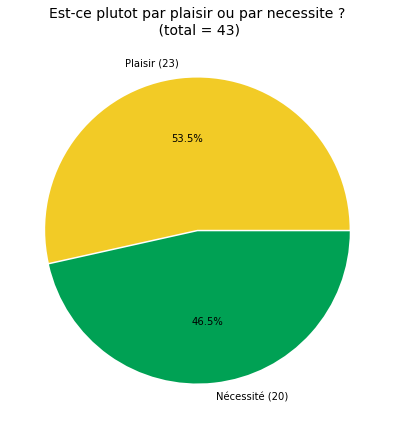

In [11]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_Plaisir, it_plaisir_lbls, it_plaisir_dtf = tfs.get_results(gidx=1,qid='r14e6RHnmlxH')
# Les afficher sous forme de camembert
myfig.plot_mbr_camembert(qtitle = q_Plaisir, list_labels = it_plaisir_lbls, list_dtfs = it_plaisir_dtf)

## Bilan : 

Kif-kif.

Mais rejouissons-nous, l'avantage est au plaisir plutôt qu'à la nécessité. Cependant plus de 40% des répondant.e.s se sentent plus ou moins contraint.e.s

## 2.C - Possédez-vous un ou des objet.s suivant.s ? 

- id = DeUtJwpfRd1O ) 
- Multiple choice

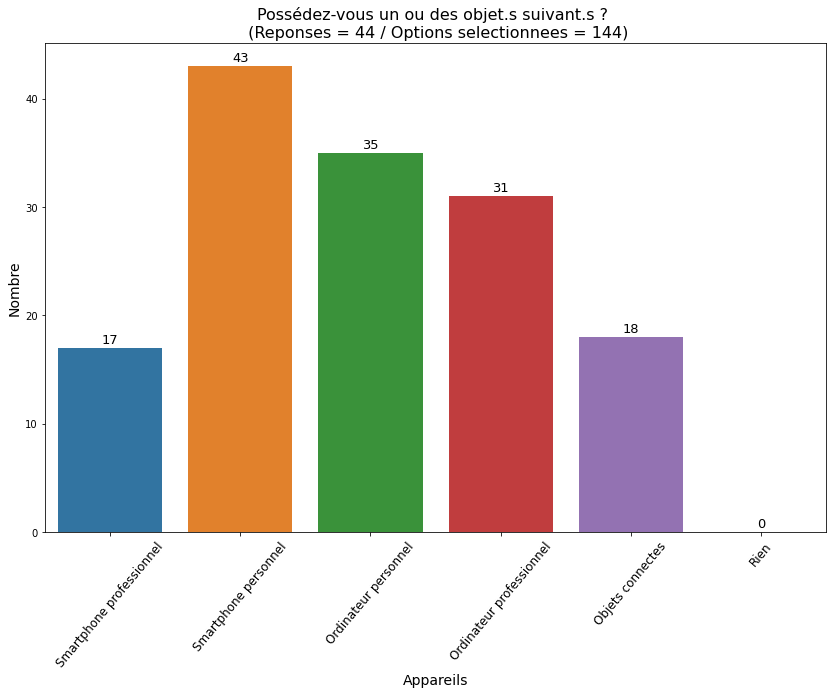

In [12]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_appareils, appareils_lbls, appareils_dtf = tfs.get_results(gidx=1,qid='DeUtJwpfRd1O')
# Modification du label "Objet connectes" pour affichage :
appareils_lbls[-2] = 'Objets connectes'
# Affichage des resultats sous forme de barres
myfig.plot_mbr_barchart(qtitle = q_appareils, list_labels = appareils_lbls, list_dfs = appareils_dtf, bar_xlabel = 'Appareils', bar_ylabel = 'Nombre', nb_responses = nb_responses)

### Calculer le nombre moyen d'appareil par personne

In [13]:
# Compter le nombre total d'appareils (on part de zero pour additionner le nombre de reponses pour chaque option)
nbappareils = 0
for i in range(len(appareils_dtf)) : 
    nbappareils += appareils_dtf[i].shape[0]
# Le comparer aux nombre de reponses au questionnaire
meanapp = nbappareils / nb_responses
# Afficher
print('Les gens ont en moyenne ' + str(meanapp) +' appareils informatique')

Les gens ont en moyenne 3.272727272727273 appareils informatique


## Bilan : 

Plus de 3 appareils par personne !

Le smartphone semble dorénavant remplacer certains usages qu'on avait d'un PC. Moi même je n'ai pas eu de PC personnel pendant plusieurs années. Mais j'en avais un professionnel.

Cependant, quand on étudie le bilan écologique de nos appareils électroniques, on peut se dire qu'on a un effort à produire en tant que société pour ajuster le nombre de terminaux nécessaires a nos activités.

Peut-etre que le BYOD ( _Bring your own device_, le fait d'utiliser son PC perso pour travailler, par exemple) peut etre une piste d'expérimentation.

## 2.D - Si vous deviez noter votre aisance personnelle avec l'informatique, combien vous donneriez-vous ? 

- id = bK9T5Pen4AB0
- Opinion Scale



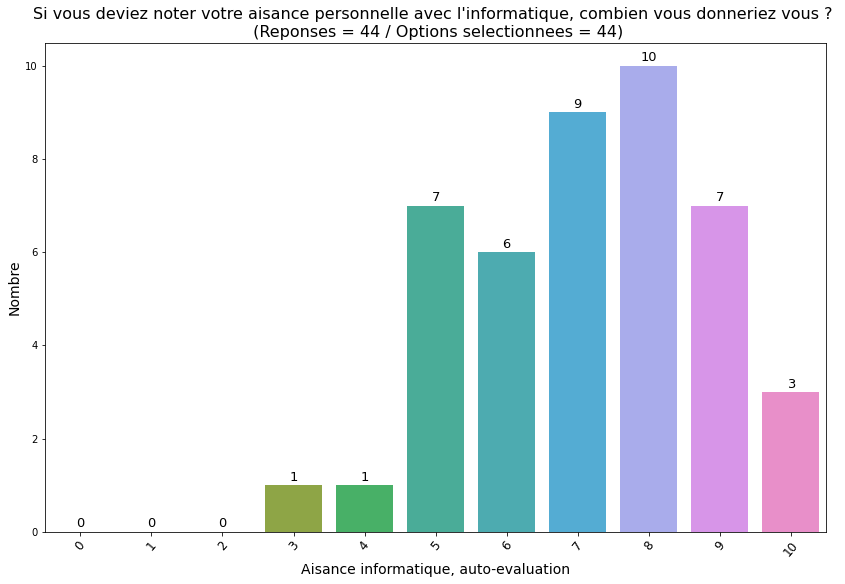

In [14]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_aisance, aisance_lbls, op_dtfs = tfs.get_results(gidx=1,qid='bK9T5Pen4AB0')
# Affichage des resultats sous forme de barres
myfig.plot_mbr_barchart(qtitle = q_aisance, list_labels = aisance_lbls, list_dfs = op_dtfs, bar_xlabel = "Aisance informatique, auto-evaluation", bar_ylabel = 'Nombre', nb_responses = nb_responses)

In [15]:
moyenne_aisance = mbrpl.moyenne_generale_note(liste_notes = aisance_lbls, liste_dtfs = op_dtfs, nbresp = nb_responses)

print('Moyenne generale : '+str(moyenne_aisance))

Moyenne generale : 7.136363636363637


## Bilan :

Vous vous sentez plutôt à l'aise avec l'informatique, avec une moyenne supérieure a 7.

Il faut tout de même garder en tête que 70% d'entre vous ont une bonne éducation, avec, j'imagine pour la plupart, le travail qui va avec. Et 1/4 des répondant.e.s travaillent dans le secteur informatique.

On peut, par contre, essayer de voir si les personnes les plus à l'aise sont celles qui pratiquent dans la vie personnelle, dans la vie professionnelle, ou les deux.


### Rapport entre l'aisance et les moments où on pratique l'informatique

In [16]:
# Croiser les résultats des des questions et afficher les options possibles pour nous les rappeler
q_timetoIT, l_timetoIT_lbl, l__timetoIT_dtfs, q_aisance, aisance_lbls, aisance_byapprentissage_dtfs = tfs.get_x_res(gidx1=1,qid1='EyykV9VMHRBS', gidx2=1,qid2='bK9T5Pen4AB0')

Quand utilisez-vous le plus souvent des outils numériques ?:
  ['Dans la vie privée', 'Dans la vie professionnelle', 'Tout le temps', 'Le moins possible']
Si vous deviez noter votre aisance personnelle avec l'informatique, combien vous donneriez vous ?:
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


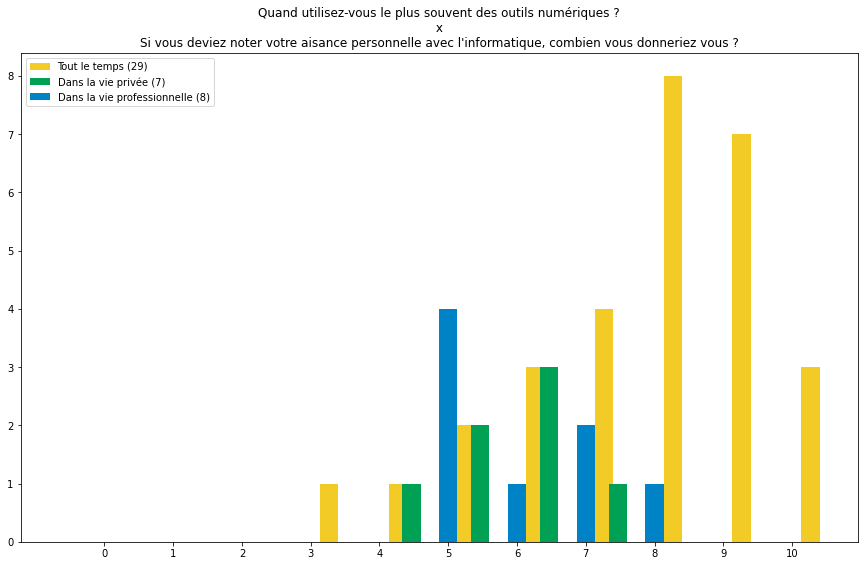

In [17]:
# Faire un graphique en barre pour ces résultats croisés.
cln_df_xresults = myfig.plot_mbr_multiple_bars(qtitle = q_timetoIT + '\n x \n' + q_aisance, xlist_labels = aisance_lbls, legends = l_timetoIT_lbl, list_sub_dtfs = aisance_byapprentissage_dtfs, bar_indxs = [-2,0,1,-1])

## Bilan :

Celles et ceux qui s'en sortent le mieux sont celles et ceux qui pratiquent le plus souvent. On pourrait même se dire que celles et ceux qui décident de l'utiliser dans la vie privée sont généralement plus enclins a être à l'aise, car iels s'y sentent peut-être moins contraint.e.s


## 2.E - Avez-vous l'impression de maîtriser les informations qui vous concernent sur Internet ? 

- id = IihvSDBsSpUH 
- Opinion scale

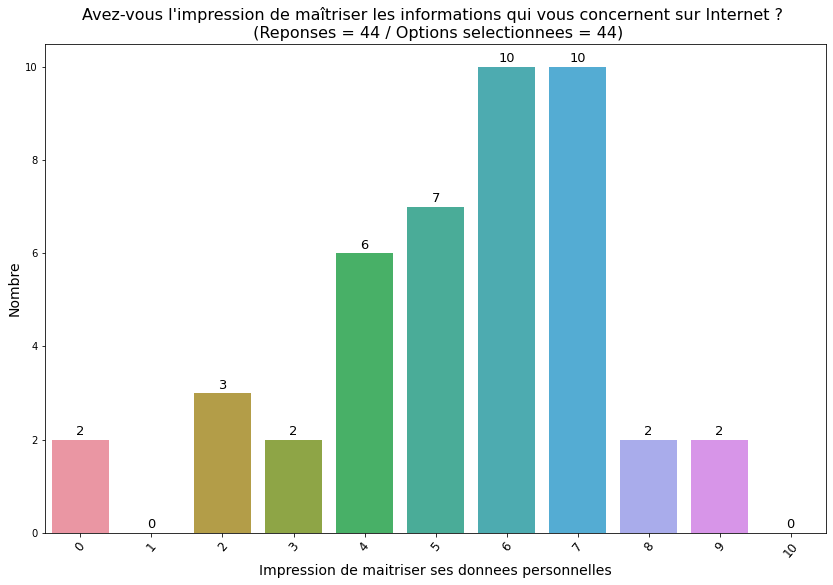

In [18]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_confiance, confiance_lbls, confiance_dtfs = tfs.get_results(gidx=1,qid='IihvSDBsSpUH')
# Affichage des resultats sous forme de barres
myfig.plot_mbr_barchart(qtitle = q_confiance, list_labels = confiance_lbls, list_dfs = confiance_dtfs, bar_xlabel = "Impression de maitriser ses donnees personnelles", bar_ylabel = 'Nombre', nb_responses = nb_responses)

In [19]:
moyenne_maitrise = mbrpl.moyenne_generale_note(liste_notes = confiance_lbls, liste_dtfs = confiance_dtfs, nbresp = nb_responses)

print('Moyenne generale : '+str(moyenne_maitrise))

Moyenne generale : 5.340909090909091


## Bilan :

On se sent beaucoup moins à l'aise en ce qui concerne la maîtrise de nos données à caractère personnel.

C'est normal, en un sens, parce que le web, ces derniers temps, ne s'est developpé qu'avec des services privés dont le _business model_ est de proposer des offres gratuites au grand public, en échange de nos données personnelles. C'était inscrit dans les conditions d'utilisation qu'on ne lit que peu. Tout le système mercantile du web s'est donc basé là-dessus. Et, aujourd'hui, on a l'impression d'être dépossédé de nos données dès qu'on se met a surfer la toile. Il est urgent de se la réapproprier !

Si vous voulez lire un de mes articles a ce sujet, c'est [ici](https://maximorose.eu/2021/01/19/decolonisons-internet/)


## 2.F - Si vous avez mis plus de 7 à la question précédente, parametrez-vous les cookies quand les sites vous le proposent ? 

- id = HapPLe0c3LtH 
- Single choice

Si quelqu'un pense maîtriser ses données personnelles, il doit paramétrer, au moins parfois, ces traceurs. 

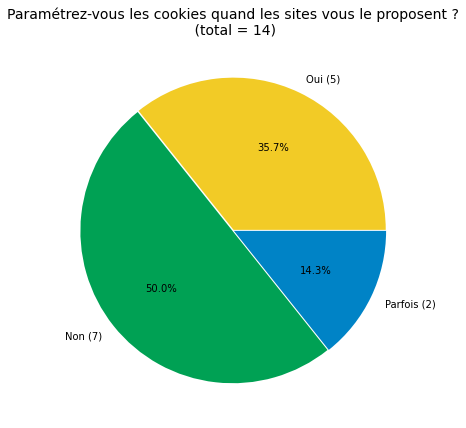

In [20]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_cookiz, cookiz_lbls, ckz_lbls_dtfs = tfs.get_results(gidx=1,qid='HapPLe0c3LtH')
# Les afficher sous forme de camembert
myfig.plot_mbr_camembert(qtitle = q_cookiz, list_labels = cookiz_lbls, list_dtfs = ckz_lbls_dtfs)

## Bilan :

Certains d'entre vous se sont donnés une maîtrise de leur données personnelles supérieure à 7, mais 50% de ces derniers admettent ne pas configurer les cookies quand ils vont sur des sites.

Seulement 15.9% des repondants peuvent donc réellement prétendre avoir une bonne maîtrise de leur données personnelles, puisque, si l'on accepte les cookies, on accepte que notre navigation soit analysée par tous les partenaires commerciaux des sites que nous visitons. En bref, si l'on ne configure pas ses cookies, il est presque inévitable que Google et FaceBook analysent notre comportement.

## 2.G - Avez-vous l'impression de recevoir trop de messages promotionnels sur votre boîte mail ? 

- id = 4xciwhJq09rE 
- Opinion scale

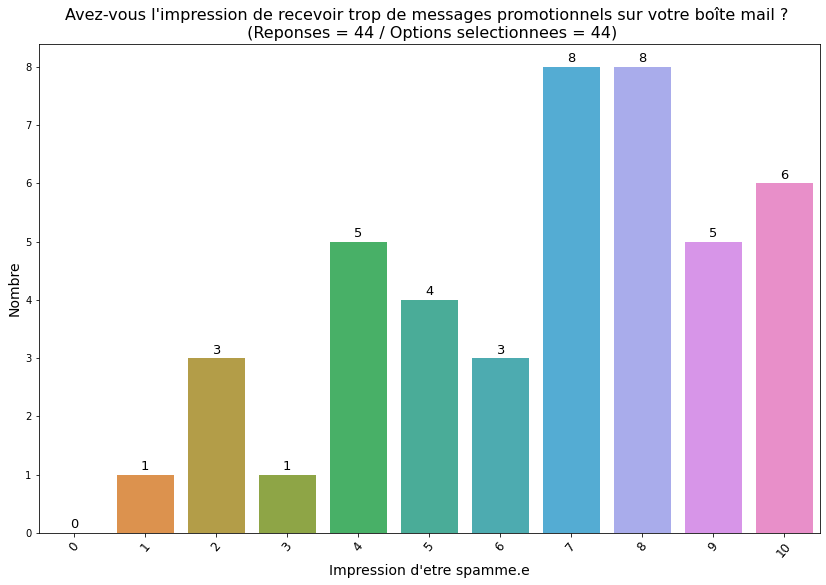

In [21]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_spams, spams_lbls, spam_dtfs = tfs.get_results(gidx=1,qid='4xciwhJq09rE')
# Affichage des resultats sous forme de barres
myfig.plot_mbr_barchart(qtitle = q_spams, list_labels = spams_lbls, list_dfs = spam_dtfs, bar_xlabel = "Impression d'etre spamme.e", bar_ylabel = 'Nombre', nb_responses = nb_responses)

In [22]:
moyenne_spam = mbrpl.moyenne_generale_note(liste_notes = spams_lbls, liste_dtfs = spam_dtfs, nbresp = nb_responses)
print('Moyenne generale : '+str(moyenne_spam))

Moyenne generale : 6.659090909090909


## Bilan :

Implication directe de la question précédente, l'usage que nous avons eu du web jusqu'a maintenant a eut un impact nocif sur nos boites e-mail. Nos adresses ont été partagées par beaucoup d'acteurs commerciaux et nos boîtes se remplissent de déchets numériques.


### Si vous avez l'impression de recevoir trop de messages promotionnels :

Théoriquement, si vous recevez trop de messages promotionnels, vous pouvez vous désabonner de chacun un par un. Mais c'est long, et pas toujours efficace, parce que parfois, cela ne vous désabonne que d'une seule des multiples _newsletters_ d'un organisme.

Le mieux à faire est probablement de doucement migrer vers une nouvelle boîte mail que vous créerez. Comme ça, vous serez sûrs que tous ceux qui profitent de vos informations de contact ne sauront plus où vous trouver.

Puis cela pourrait être l'occasion de choisir un fournisseur de service plus respectueux de vos données personnelles, plus securisé aussi, comme [proton mail](https://protonmail.com/fr), un acteur suisse bien côté.

Il existe même sêrement des fournisseurs de boîtes mails qui soient plus écologiques que Gmail ou Outlook, mais je n'ai pas cherché. 

Dans tous les cas, il faut voir cela comme un processus un peu long, où, petit a petit, on donne a nos contacts notre nouvelle adresse. On ne l'utilise pas sur tous les sites. On garde l'ancienne pour se créer des comptes sur les sites des magasins en ligne, parce qu'il y a des chances qu'ils nous sollicitent pas mal commercialement. 

Au final, la recommandation serait d'avoir une adresse pour les déchets potentiels, et une pour ce qui plus important.

## 2.H - Comment gérez-vous vos mots de passe des différents sites web ? 

- id = ZkMwKgLi3nvp 
- Single Choice

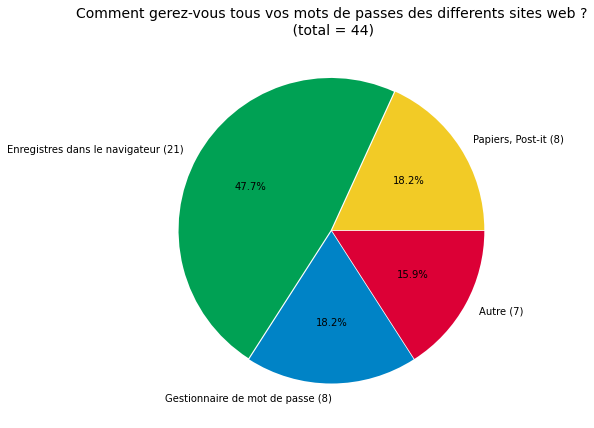

In [23]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_gestMDP, l_gestMDP_lbl, l_gestMDP_dtfs = tfs.get_results(gidx=1,qid='ZkMwKgLi3nvp')
# Modification des labels pour visibilite
fresh_lbls = ['Papiers, Post-it', 'Enregistres dans le navigateur', 'Gestionnaire de mot de passe', 'Autre']
# Les afficher sous forme de camembert
myfig.plot_mbr_camembert(qtitle = q_gestMDP, list_labels = l_gestMDP_lbl, list_dtfs = l_gestMDP_dtfs, fresh_lbls = fresh_lbls)

### Recuperer une dizaine de 'Autres'

In [24]:
l_gestMDP_dtfs[-1][l_gestMDP_lbl[-1]].head(10)

4                                               Mémoire
9                      My brain is never hacked neither
17    tu crois que je vais le révéler sur internet ?...
18                  je les retiens tous dans ma tête ;)
20                                              Fichier
36     dans ma tete, parce que je suis un génie créatif
41         Mémoire et fichier txt sur disque dur crypté
Name: Other.1, dtype: object

## Bilan :

La plupart d'entre vous les enregistre dans leur navigateur. C'est souvent la moins sécurisée des options. Parce qu'elle utilise l'interface même d'accès à internet, le navigateur. C'est a dire la frontière entre le web et vous. C'est donc une partie que les attaquants cherchent souvent à percer.

Pour les post-its, si vous les collez sur votre clavier, on peut considérer que vous n'avez même pas de mots de passe. Donc ce serait un risque. Sauf si votre ordinateur et votre mot de passe sont dans une pièce fermée a clé.
Si vous les mettez sur des post-it, dans un tiroir a clé. C'est mieux. Au moins on sait qu'ils ne seront visibles que de celles et ceux qui auraient la clé.

Si vous utilisez votre mémoire, bravo, seul le KGB peut vous faire parler.

Personnellement je ne peux pas utiliser ma mémoire, car je n'en ai pas. Et les post-it ne sont pas pratiques, étant donné que j'ai souvent besoin de me connecter à distance, en déplacement, etc. Du coup, le top, c'est le gestionnaire de mot de passe.

Il stocke tous les mots de passe dans un fichier crypté. C'est a dire dans un fichier qu'on ne peut ouvrir qu'avec un mot de passe (oui, ca vous rajoute un mot de passe. Mais c'est presque le seul que vous aurez a retenir. Si j'y arrive, vous y arriverez)

S'il vous faut un tuto, écrivez-moi. Sinon, l'ANSSI propose quelques conseils pour la gestion de mots de passe ([ici](https://www.ssi.gouv.fr/guide/mot-de-passe/)), et la CNIL aussi ([là](https://www.cnil.fr/fr/les-conseils-de-la-cnil-pour-un-bon-mot-de-passe)).

## 2.I - Pensez-vous que l'informatique soit une bénédiction ou une malédiction ? 

- id = rT2VhptKefBR 
- Single Choice

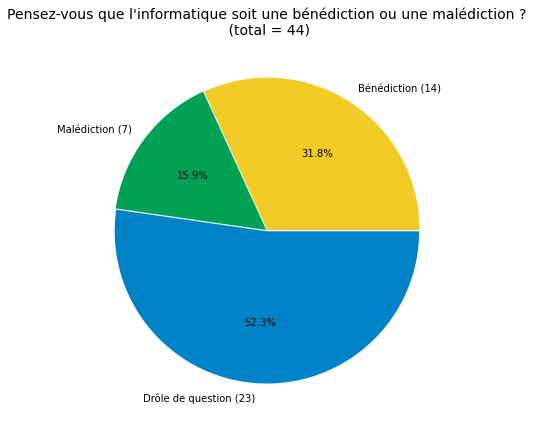

In [25]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_bene, l_bene_lbl, l_bene_dtfs = tfs.get_results(gidx=1,qid='rT2VhptKefBR')
# Les afficher sous forme de camembert
myfig.plot_mbr_camembert(qtitle = q_bene, list_labels = l_bene_lbl, list_dtfs = l_bene_dtfs)

## Bilan :

Je trouve aussi que c'est une drôle de question. En vrai, je l'ai surtout faite parce que j'aime bien mettre du spirituel partout. C'est comme de la mayonnaise. La question un peu plus formelle qui est équivalente est la 2.B : "Utilisez-vous l'informatique plutôt par plaisir ou par nécessité ?"

Elle donne déjà une idée de votre rapport au numérique. Après, si vous trouvez que les contraintes sont des bénédictions, c'est peut-être que avez atteint le Zen, ou le nirvana BDSM.

On peut essayer d'isoler ce type d'individus, on verra s'il y en a, et si oui, on réfléchira à ce qu'on en fait. C'est aussi à ça que peut servir l'informatique : à stigmatiser.

In [26]:
# On récupère le nom de la questions : ['Plaisir', 'Nécessité'], car il nous permettra de filtrer les résultats :
question_plaisir = tfs.get_q_title(gidx=1,qid='r14e6RHnmlxH')
question_benedection = tfs.get_q_title(gidx=1,qid='rT2VhptKefBR')

# On ne conserve que les réponses = 'Nécessité' pour la question "question_plaisir"
df_necessiteux = form_responses[form_responses[question_plaisir] == 'Nécessité']
# On ne conserve que les réponses = 'Bénédiction' pour la question "question_benedection"
df_necessiteux_qui_aiment_ca = df_necessiteux[df_necessiteux[question_benedection] == 'Bénédiction']

# On affiche le nombre de lignes du tableau qu'on vient de filtrer pour savoir combien de personnes ont selectionné les deux réponses attendues aux questions :
nombre_de_moine_zen_ou_sm = df_necessiteux_qui_aiment_ca.shape[0]
# On affiche une phrase avec le resultat dedans
print("Il y a " + str(nombre_de_moine_zen_ou_sm) + " moines zen ou sado masochistes qui ont repondu")

Il y a 7 moines zen ou sado masochistes qui ont repondu


--------------------------------------------------------

# GROUP 3 - ENSEIGNEMENT ET EDUCATION

--------------------------------------------------------

- Group index = 2

## 3.A - A l'école, vous a-t-on enseigné l'informatique ? 

- id = NXnMNhHW9dGK 
- Single Choice

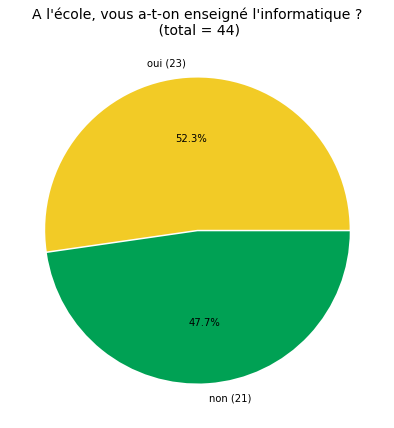

In [27]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_apprentissage, l_apprentissage_lbl, l_apprentissage_dtfs = tfs.get_results(gidx=2,qid='NXnMNhHW9dGK')
# Les afficher sous forme de camembert
myfig.plot_mbr_camembert(qtitle = q_apprentissage, list_labels = l_apprentissage_lbl, list_dtfs = l_apprentissage_dtfs)

## Bilan :

Parmi les repondant.e.s presque la moitié déclare ne pas avoir appris l'informatique a l'école. Ce qui est inquiétant, c'est que les répondant.e.s représentent une part eduquée de la population.

On peut croiser ce résultat avec l'âge des répondants, puisqu'on sait que l'éducation informatique a eut du mal à se mettre en place en France.

### Education informatique en fonction de l'age des répondant.e.s

In [28]:
# recuperer les resultats aux questions, les options possibles et les noms des questions
q_apprentissage, l_apprentissage_lbl, l_apprentissage_dtfs, q_age, age_lbls, age_byapprentissage_dtfs = tfs.get_x_res(gidx1=2,qid1='NXnMNhHW9dGK', gidx2=0,qid2='BZsILkKYGzKQ')

A l'école, vous a-t-on enseigné l'informatique ?:
  ['oui', 'non']
Quel est votre âge ?:
  ['Moins de 18 ans', 'Entre 18 et 25 ans', 'Entre 26 et 35 ans', 'Entre 36 et 50 ans', 'Entre 51 et 75 ans', '76 ans et plus']


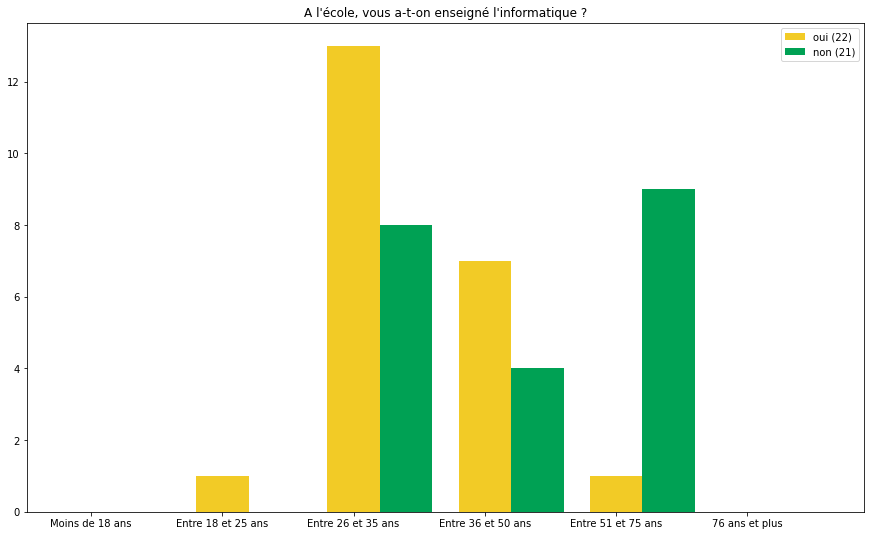

In [29]:
age_byapprentissage_dtfs = myfig.plot_mbr_multiple_bars(qtitle = q_apprentissage, xlist_labels = age_lbls, legends = l_apprentissage_lbl, list_sub_dtfs = age_byapprentissage_dtfs, bar_indxs = [0,1])

## Bilan :
Si on a plus de 30 ans, il y a de grandes chances qu'on n'ait pas reçu d'éducation informatique.

Et l'expérience d'enseignement qu'on a eu, quand on a un peu plus de 30 ans, était principalement ce qu'on appelle de la littératie. C'est à dire qu'au college, on nous apprenait comment fonctionnaient certains outils informatiques, comme Word, Excel ou encore un moteur de recherche (Yahoo, Lycos, Google), mais on ne nous apprenait pas vraiment comment fonctionnent les machines universelles (les ordinateurs): l'électronique et l'informatique qui supportent tous les outils numériques ; le langage binaire ; la pensee modulaire ; etc.

Considerons donc les [statistiques de l'INSEE](https://www.insee.fr/fr/statistiques/3676623?sommaire=3696937), concernant l'age de la population active francaise : 

|  | Femmes | Hommes | Total |
| --- | --- | --- | --- |
| 15 a 24 ans | 1 248 | 1 532 | 2 780
| 25 à 49 ans | 8 703 | 9 435 | 18 138
| 50 à 64 ans | 4 142 | 4 228 | 8 370
| Total 15 à 64 ans | 14 094 | 15 194 | 29 288
| 15 ans ou plus | 14 263 | 15 404 | 29 668


90% des actifs francais ont plus de 25 ans.

On peut facilement imaginer que plus de 70% de la population active a plus de 35 ans et n'a donc pas bénéficié d'un enseignement informatique convenable pour appréhender le monde qui l'entoure dorénavant.

Il peut être intéressant de voir en quoi l'éducation informatique peut influencer l'aisance informatique de la question 2.D

## Influence d'une éducation informatique sur l'aisance.

In [30]:
# Récupérer les résultats croiser des questions "Avez-vous appris l'informatique à l'école"
q_apprentissage, l_apprentissage_lbl, l_apprentissage_dtfs, q_aisance, aisance_lbls, aisance_byapprentissage_dtfs = tfs.get_x_res(gidx1=2,qid1='NXnMNhHW9dGK', gidx2=1,qid2='bK9T5Pen4AB0')

A l'école, vous a-t-on enseigné l'informatique ?:
  ['oui', 'non']
Si vous deviez noter votre aisance personnelle avec l'informatique, combien vous donneriez vous ?:
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


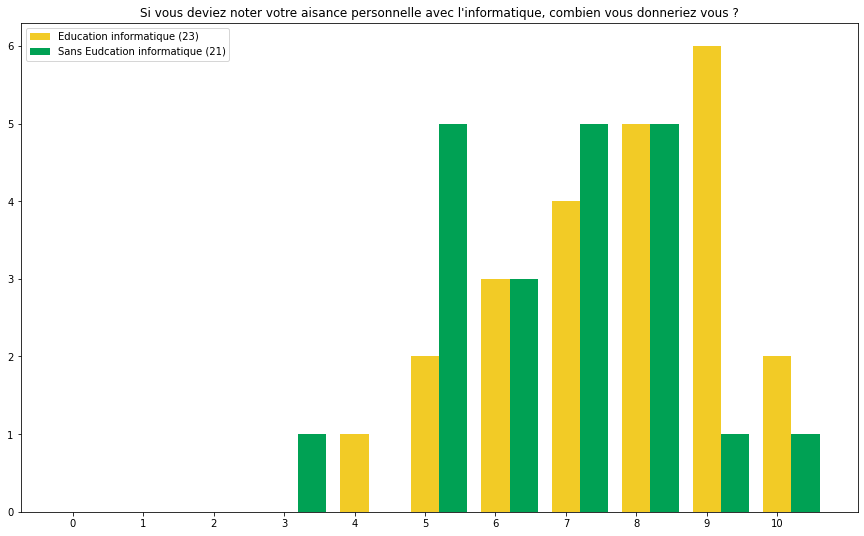

In [31]:
# Modifier les labels "oui" et "non", pour etre plus parlants : 
l_apprentissage_lbl[0] = "Education informatique"
l_apprentissage_lbl[1] = "Sans Eudcation informatique"
# Appel fonction mbr multiple bar charts
cln_df_aisance_byageapprentissage = myfig.plot_mbr_multiple_bars(qtitle = q_aisance, xlist_labels = aisance_lbls, legends = l_apprentissage_lbl, list_sub_dtfs = aisance_byapprentissage_dtfs, bar_indxs = [0, 1])

In [32]:
df_aisancebyapprentissage_moyennes = mbrpl.print_moyennes_xresults_mbarchart(df_xplot = cln_df_aisance_byageapprentissage, listofnotes = aisance_lbls)

Moyenne 'Education informatique' = 7.565217391304348
Moyenne 'Sans Eudcation informatique' = 6.666666666666667


## Bilan

Apprendre l'informatique a l'école, ça aide, apparemment, mais ça ne fait pas tout. 

Celles et ceux qui ne l'ont pas appris à l'école sont un peu moins à l'aise. Il y a plus de chance qu'iel se donnent une note inférieure à 8, mais on constate que certaines personnes qui ont appris l'informatique à l'ecole peuvent pourtant se sentir désemparées face aux ecrans. 

## 3.B - Si vous avez appris l'informatique à l'école, durant quelle partie de votre scolarité etait-ce ? 

- id = evUI2CmdoK14 
- Multiple Choice

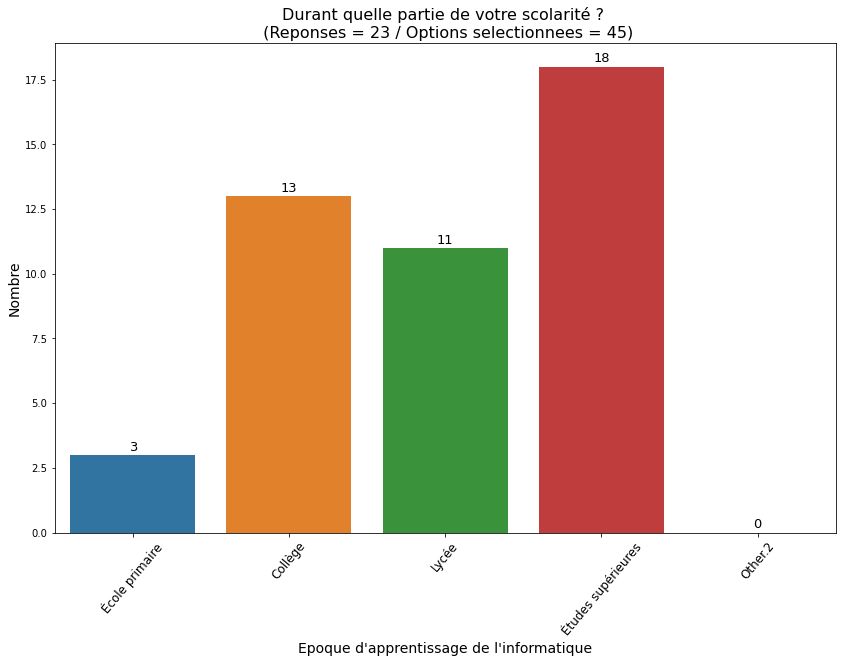

In [33]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_timetolearn, timetolearn_lbls, timetolearn_dtf = tfs.get_results(gidx=2,qid='evUI2CmdoK14')
# Affichage des resultats sous forme de barres
myfig.plot_mbr_barchart(qtitle = q_timetolearn, list_labels = timetolearn_lbls, list_dfs = timetolearn_dtf, bar_xlabel = "Epoque d'apprentissage de l'informatique", bar_ylabel = 'Nombre', nb_responses = l_apprentissage_dtfs[0].shape[0])

## Bilan

Aucune des périodes scolaires n'a été selectionnée par 100% des répondant.e.s. Ceci peut être du à la mise en place tardive d'un tronc commun informatique en France : Le CAPES, le diplôme des enseignants de collège-lycée, d'informatique n'existe en France que depuis 2019. Avant cela, les thématiques liées à l'informatique n'étaient abordées que dans certaines classes de technologie, ou dans des lycées techniques.

C'est finalement en études supérieures que la plupart des répondant.e.s déclare avoir appris l'informatique. On peut donc assez facilement imaginer que la partie de la population qui n'a pas fait d'études supérieures n'a pas eu une formation convenable en informatique, même si elle s'y retrouve aujourd'hui confrontée au quotidien.

## 3.C - Avez-vous bénéficié de formations, dans le cadre de votre travail ou non, en informatique ? 

- id = hENgGmnFSnpK 
- Yes/no


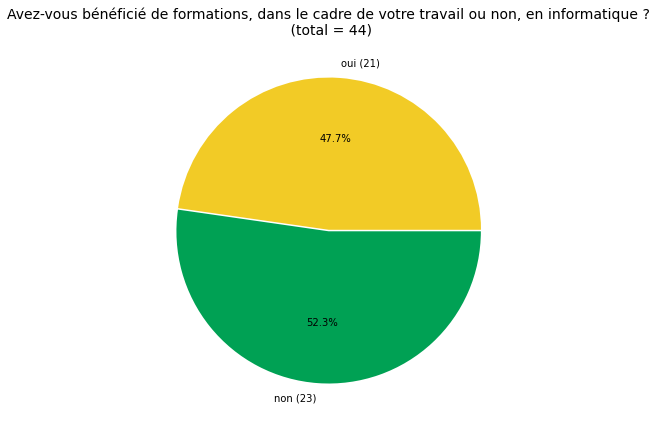

In [34]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_formpro, formpro_lbls, formpro_dtf = tfs.get_results(gidx=2,qid='hENgGmnFSnpK')
# Affichage des resultats sous forme de camembert
myfig.plot_mbr_camembert(qtitle = q_formpro, list_labels = formpro_lbls, list_dtfs = formpro_dtf)

## Bilan : 

Cette question devait servir à voir si les entreprises pouvaient compenser les manques de l'éducation nationale dans le domaine.

Mais il faut aussi se dire que les dirigeants des entreprises n'ont eux-mêmes pas forcément été éduqués à l'informatique. Dans ce cas, ce n'est sûrement pas un choix prioritaire dans les cursus de formations pour les employés.

C'est ainsi que peuvent se traduire des carrences culturelles : elles tracent des crevasses qui s'élargissent au fil du temps.

## 3.D - Savez-vous écrire les nombres en binaire ? 

- id = TtSJ6Qnx4pQF 
- Yes/No

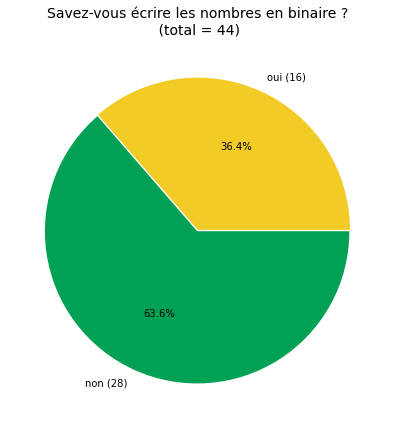

In [35]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_knobinary, knobinary_lbls, knobinary_dtf = tfs.get_results(gidx=2,qid='TtSJ6Qnx4pQF')
# Affichage des resultats sous forme de camembert
myfig.plot_mbr_camembert(qtitle = q_knobinary, list_labels = knobinary_lbls, list_dtfs = knobinary_dtf)

## Bilan :

23 personnes declaraient avoir bénéficié d'un enseignement informatique, mais seulement 16 savent écrire en binaire. Il est à noter que seules 11 personnes déclaraient travailler dans l'informatique, nous en avons donc 4 qui ont appris sans que ce soit directement nécessaire pour leur activité professionnelle.

Sachez que le binaire peut s'apprendre des 5 ans. (source : [CS Unplugged](https://csunplugged.org/fr/topics/binary-numbers/))

La maîtrise de l'écriture binaire offre une représentation additionnelle des nombres et favorise donc la plasticité cérébrale. On est plastique lorsqu'on est capable de se représenter une même chose de plusieurs manières différentes.

## 3.E - Si oui : Et bien prouvez le ! Que vaut 0101 ?

- id = 50aXmk8eOhtZ 
- Champ nombre

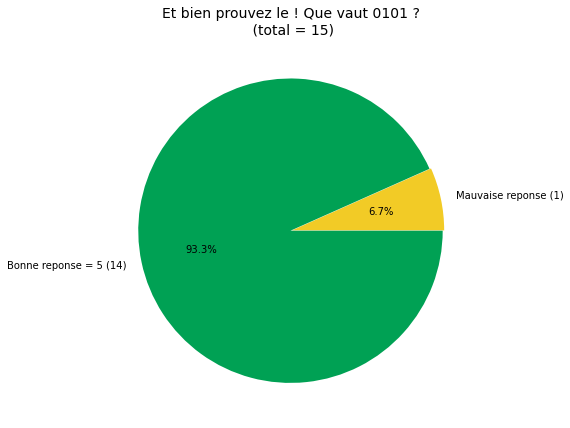

In [36]:
# Récupérer une librairie graphique
import matplotlib.pyplot as plt

# Recuperer le titre de la question
question_test_binaire = tfs.get_q_title(gidx=2,qid='50aXmk8eOhtZ')
# Déclarer le résultat attendu
resultat_attendu = 5

# Récupérer les lignes où le résultats n'est pas vide (nombre de personnes à qui on a posé la question)
toutes_les_reponses = form_responses[form_responses[question_test_binaire].notnull()]
# Récupérer toutes les lignes où le résultat à la question est la bonne réponse
bonnes_reponses = toutes_les_reponses[toutes_les_reponses[question_test_binaire] == resultat_attendu]
# Récupérer toutes les lignes où le résultat à la question est une mauvaise réponse
mauvaises_reponses =  toutes_les_reponses[toutes_les_reponses[question_test_binaire] != resultat_attendu]

# Préparer les éléments pour faire un camembert (les valeurs et la légende)
values = [mauvaises_reponses.shape[0], bonnes_reponses.shape[0]]
labels = ['Mauvaise reponse (' + str(values[0]) + ')' , 'Bonne reponse = 5 (' + str(values[1]) + ')']

# Faire un camembert à partir de ces éléments (et de quelques préférences graphiques que j'ai)
fig = plt.figure(figsize =(10, 7))
plt.pie(values, labels = labels, autopct='%1.1f%%',colors=['#f2cb26', '#00a154'], explode = (0.005,)*2)
plt.title(question_test_binaire + "\n (total = "+str(toutes_les_reponses.shape[0])+")", size = 14)
plt.show()

## Bilan :

On a attrapé un.e mytho : Iel a dit savoir écrire en binaire, mais iel est tombé.e dans le piège !

En vrai, c'etait peut-être une étourderie ou une faute de frappe, mais nous sommes là pour tirer des conclusions qui font mal !

## 3.F - Si vous ne savez pas écrire en binaire, et que je vous disais que je pouvais vous l'enseigner en une demie-heure, seriez-vous intéressé.e.s pour apprendre ? 

- id = Sj58NG9HjORn 
- Yes/No

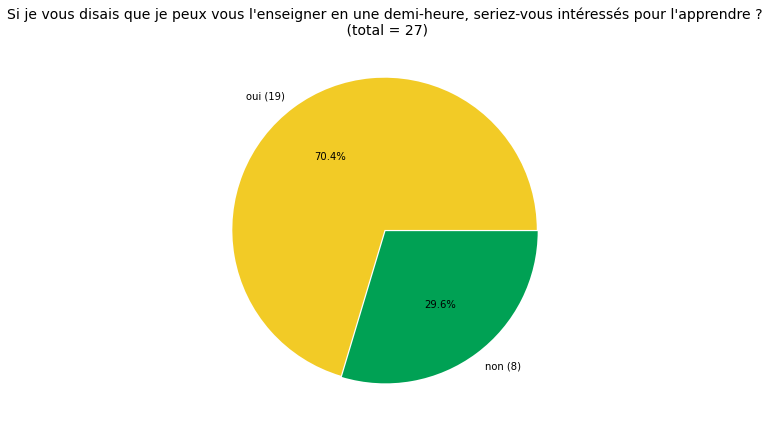

In [37]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_enviedapprendre, enviedapprendre_lbls, enviedapprendre_dtf = tfs.get_results(gidx=2,qid='Sj58NG9HjORn')
# Affichage des resultats sous forme de camembert
myfig.plot_mbr_camembert(qtitle = q_enviedapprendre, list_labels = enviedapprendre_lbls, list_dtfs = enviedapprendre_dtf)

## Bilan :

Quelles joie ! 70% d'entre vous aimeraient apprendre !

Pour les autres, j'essaierai de vous convaincre, même si ce devait être long et pénible.

## 3.G - Seriez-vous intéressés, même si ce devait être payant ? 

- id = FrOxlYq8Jwsu 
- Yes/No

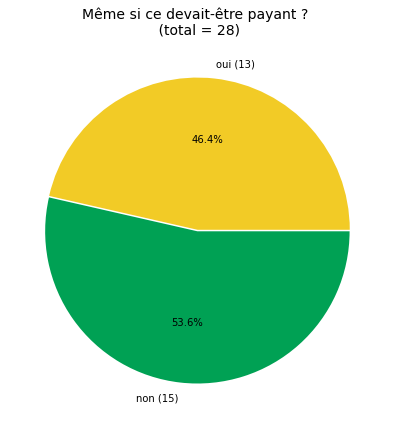

In [38]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_enviedapprendre_memesipayant, enviedapprendre_memesipayant_lbls, enviedapprendre_memesipayant_dtf = tfs.get_results(gidx=2,qid='FrOxlYq8Jwsu')
# Affichage des resultats sous forme de camembert
myfig.plot_mbr_camembert(qtitle = q_enviedapprendre_memesipayant, list_labels = enviedapprendre_memesipayant_lbls, list_dtfs = enviedapprendre_memesipayant_dtf)

## Bilan : 


C'est ce que je craignais, vous n'êtes pas prêt a débourser 1 cents...

Où peut-être croyez-vous qu'en répondant non, nous proposerons des contenus gratuits xD.

Effectivement, nous pourrions proposer des supports gratuits, comme des pages web ou des jeux videos. Mais ce sera évidemment moins sympa et efficace que de participer à un atelier animé par l'équipe. Et c'est pour ce plaisir là que certain.e.s paieront.

## 3.H - Combien seriez-vous pret a payer ? 

- id = v2XKUtC6wDIT 
- single choice

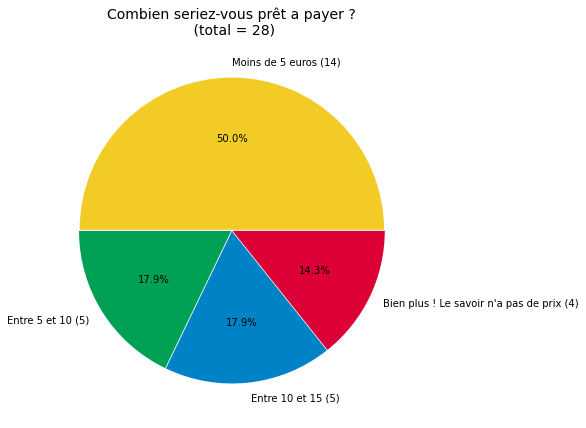

In [39]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_howmuch, howmuch_lbls, howmuch_dtf = tfs.get_results(gidx=2, qid='v2XKUtC6wDIT')
# Affichage des resultats sous forme de camembert
myfig.plot_mbr_camembert(qtitle = q_howmuch, list_labels = howmuch_lbls, list_dtfs = howmuch_dtf)

## Bilan

50% des intérogé.e.s sont prêt.e.s à payer plus de 5€. Une estimation à la louche serait entre 8€ et 10€. 

Mais il faut encore calculer combien coûte un animateur, et tout le nécessaire pour animer, afin d'être sûr que cela ait du sens, économiquement. Sinon, je vous ferais des vidéos, mais c'est quand même moins interactif.

## 3.I - Savez-vous ce qu'est un algorithme ? 

- id = wgAdSVuU7RBX 
- single choice

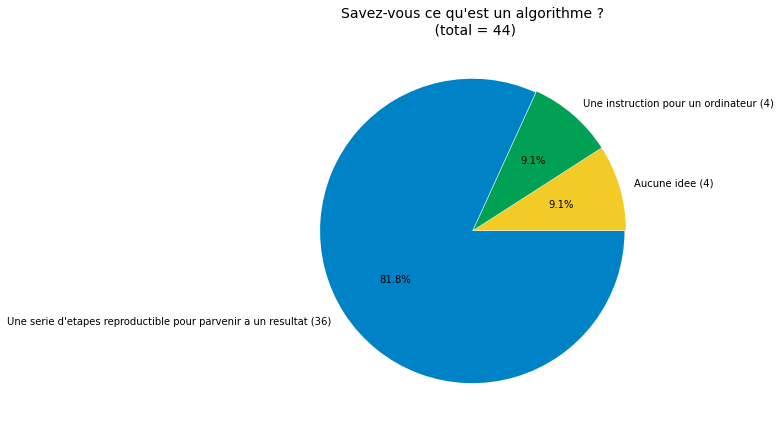

In [40]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_whatisalgo, whatisalgo_lbls, whatisalgo_dtf = tfs.get_results(gidx=2, qid='wgAdSVuU7RBX')
# Affichage des resultats sous forme de camembert
myfig.plot_mbr_camembert(qtitle = q_whatisalgo, list_labels = whatisalgo_lbls, list_dtfs = whatisalgo_dtf)

## Bilan :

Bravo ! Plus de 80% a eu la bonne reponse.

Pour les autres : c'est une série d'étapes reproductibles.

Vous voyez, quand vous devez résoudre un problème de mathématiques, vous devez généralement trouver une réponse précise. 42 ! Par exemple.

Quand on doit résoudre un problème d'informatique, on doit trouver un algorithme : c'est a dire un processus, une série d'étapes reproductibles, qui permet de parvenir à la réponse à une question, dans un contexte donné. 

Exemple : Quand vous utilisez une carte sur Internet, c'est le même algorithme qui calcul votre itinéraire, quel que soit votre point de départ et votre destination. Cet algorithme, c'est la séquence d'étapes logiques qui permet de répondre à la question : "quel itinéraire choisir entre un point de départ et un point d'arrivée dans une ville donnée ?". 

## 3.J Pensez-vous qu'il est important d'apprendre l'informatique a l'ecole ? 

- id = I789HlZQYdNO 
- Yes No

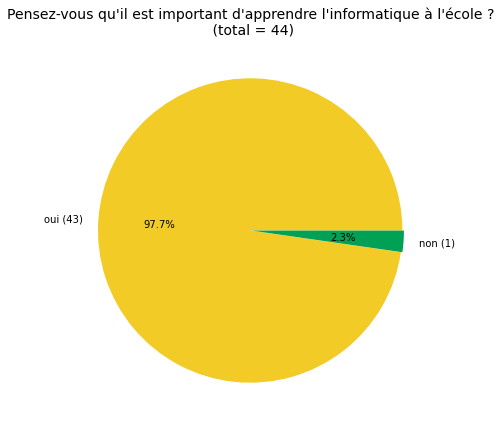

In [41]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_italecole, italecole_lbls, italecole_dtf = tfs.get_results(gidx=2, qid='I789HlZQYdNO')
# Affichage des resultats sous forme de camembert
myfig.plot_mbr_camembert(qtitle = q_italecole, list_labels = italecole_lbls, list_dtfs = italecole_dtf)

## Bilan :

Nous sommes d'accord !

Mais évidemment, c'est sûrement lié a notre mode de vie et notre culture. La personne qui a repondu "non" vit peut-être dans un environnement où l'informatique n'est pas nécessaire, et ne voit donc pas d'intérêt à ce que chacun le comprenne.

## 3.L - A partir de quel age pensez-vous qu'on peut apprendre les sciences de l'information (écriture binaire, alorithmes, programmation) ? 

- id =  Fr1Ipxc0yrTU 
- Number 

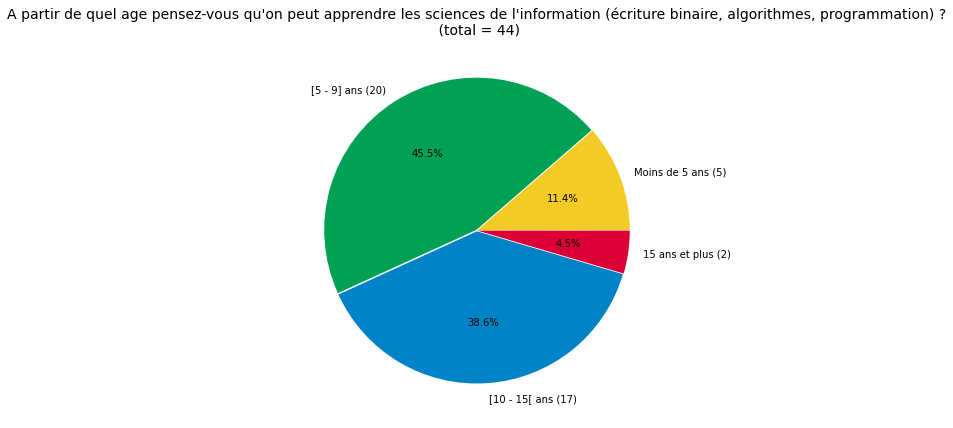

In [42]:
q_quelage_pourapprendre = tfs.get_q_title(gidx=2,qid='Fr1Ipxc0yrTU')

nb_inferieur_a_5 = form_responses[form_responses[q_quelage_pourapprendre] < 5]
nb_5_9 = form_responses[form_responses[q_quelage_pourapprendre] >= 5]
nb_5_9 = nb_5_9[nb_5_9[q_quelage_pourapprendre] < 10]
nb_10_14 = form_responses[form_responses[q_quelage_pourapprendre] >= 10]
nb_10_14 = nb_10_14[nb_10_14[q_quelage_pourapprendre] < 15]
nb_15_et_plus = form_responses[form_responses[q_quelage_pourapprendre] >= 15]

values = [nb_inferieur_a_5.shape[0], nb_5_9.shape[0], nb_10_14.shape[0], nb_15_et_plus.shape[0]]
labels = ['Moins de 5 ans (' + str(values[0]) + ')', '[5 - 9] ans (' + str(values[1]) + ')', '[10 - 15[ ans (' + str(values[2]) + ')', '15 ans et plus (' + str(values[3]) + ')']


# show plot
explode = (0.005,)*len(labels)
fig = plt.figure(figsize =(10, 7))
plt.pie(values, labels = labels, autopct='%1.1f%%', colors=[ '#f2cb26', '#00a154', '#0083c6', '#dc0036', '#fc8934', '#99248B', '#fb85a7', '#00b3f0'], explode = explode) #, colors=mecolors
plt.title(q_quelage_pourapprendre + "\n (total = "+str(form_responses.shape[0])+")", size = 14)
plt.show()

## Bilan : 

La reponse est dès 5 ans (selon [CS Unplugged](https://csunplugged.org/fr/topics/binary-numbers/)). Cependant, l'enseignement Montessori avant 5 ans facilite le développement de la pensée algorithmique, mais ce n'est pas de l'informatique à proprement parler.

Disons qu'une éducation informatique de base peut commencer à être proposée entre 5 et 9 ans. De la même manière qu'on commence à apprendre les mathématiques ou la poésie à l'école primaire.

(_Pour + d'infos, vous pouvez écouter [ce podcast](https://www.franceculture.fr/emissions/les-cours-du-college-de-france/ou-va-linformatique-58-leducation-a-linformatique)_)

Il est plutôt normal d'avoir mis plus de 9 ans, car, en France, aujourd'hui, on apprend la littératie (l'informatique comme outil) à partir de 11 ans, quand on commence la technologie au collège.

## 3.M - Lorsque vous avez un problème informatique, le plus souvent, vous ...

- id = LnMLflXPfnmF 
- single choice

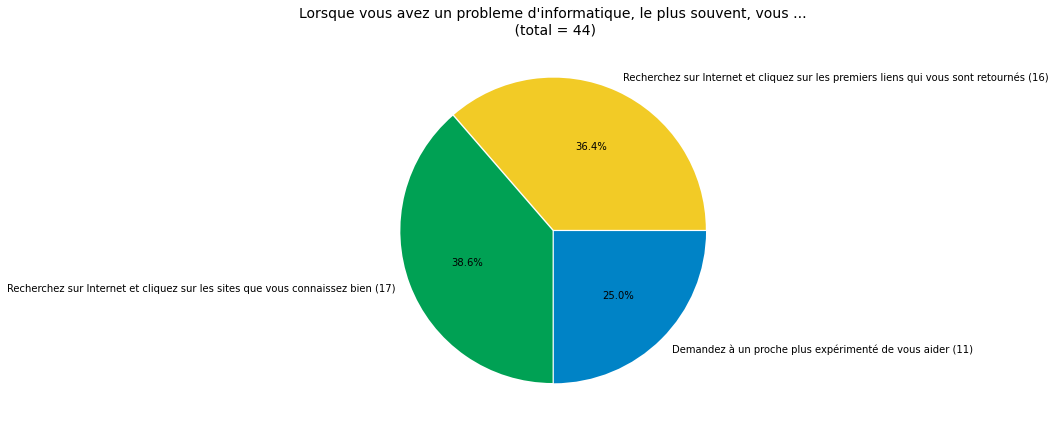

In [43]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_pblIT, pblIT_lbls, pblIT_dtf = tfs.get_results(gidx=2, qid='LnMLflXPfnmF')
myfig.plot_mbr_camembert(qtitle = q_pblIT, list_labels = pblIT_lbls, list_dtfs = pblIT_dtf)

## Bilan : 

Il y a deux reponses qui sont un peu problematiques : 
- La premiere où on clique sur les premiers liens retournés par le moteur de recherche. Car alors on se repose sur l'outil et on risque souvent de tomber sur des liens promotionnels, sur lequel un outil tiers veut qu'on clique, sans pour autant que ce soit vraiment notre besoin premier.
- Celle où on demande à un proche plus experimenté de nous aider, car même si c'est la solution en laquelle on peut sûrement avoir le plus confiance, cela veut dire qu'on n'est pas totalement autonome.

-------------------------------------------------------------------------

# GROUP 4 : L'Offre culturelle numerique

-------------------------------------------------------------------------

## 4.A - Comment vous tenez-vous informé.e.s de l'actualité culturelle ? 
- id = vyi1RKqR6x75 
- Multiple Choice

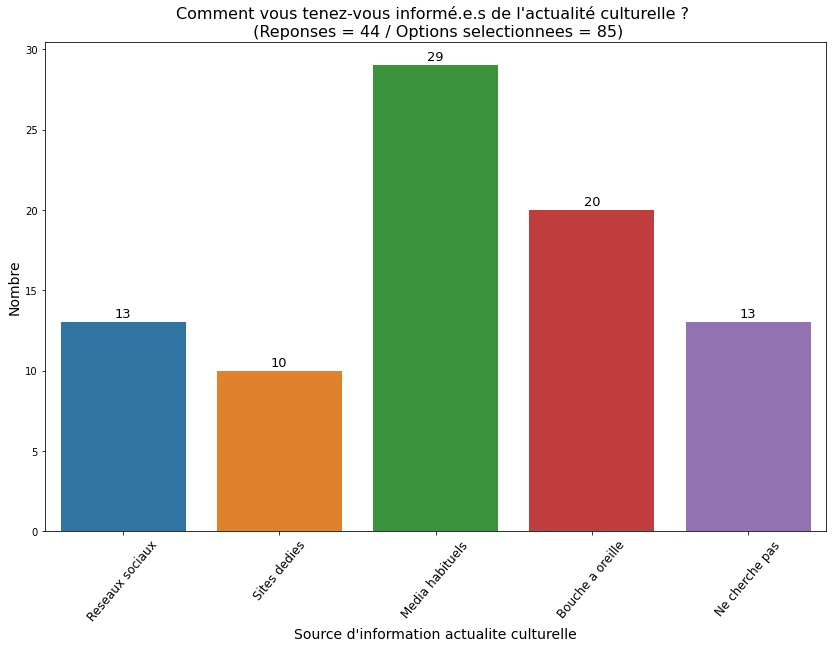

In [44]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_newsculture, newsculture_lbls, newsculture_dtf = tfs.get_results(gidx=3, qid='vyi1RKqR6x75')

# Modification des labels pour affichage
fresh_lbls = ['Reseaux sociaux', 'Sites dedies', 'Media habituels', 'Bouche a oreille', 'Ne cherche pas']

myfig.plot_mbr_barchart(qtitle = q_newsculture, list_labels = newsculture_lbls, list_dfs = newsculture_dtf, bar_xlabel = "Source d'information actualite culturelle", bar_ylabel = 'Nombre', nb_responses = nb_responses, fresh_lbls = fresh_lbls)

## Bilan  :

Les sites dediés sont finalement assez peu consultés.

Les médias habituels restent la principale source d'information avec le bouche a oreille. C'est à dire qu'en tant que centre culturel, il n'est pas nécessaire de poster un maximum de contenus sur les réseaux, car finalement on ne s'en sert pas vraiment, ni pour se cultiver, ni pour se tenir informés des évènements associés. Il est bon d'avoir une présence sur les réseaux sociaux pour un centre culturel, mais ce n'est pas directement par ces derniers que le grand public se tient informé de l'actualité culturelle. 

Il vaut mieux un bon reportage sur France 2, ou un épisode spécial d'un YouTubeur, qui vante les mérites d'une exposition que 100 vidéo postées sur YouTube pour apporter du trafic aux institutions.

C'est d'ailleurs ce que confirment certaines statistiques que j'ai commencées à faire sur YouTube.

## 4.B - Avez-vous eu l'occasion de voir une des tops videos cultures 2020 ? 

- id = SfiZNZEpZLSi 
- Single Choice

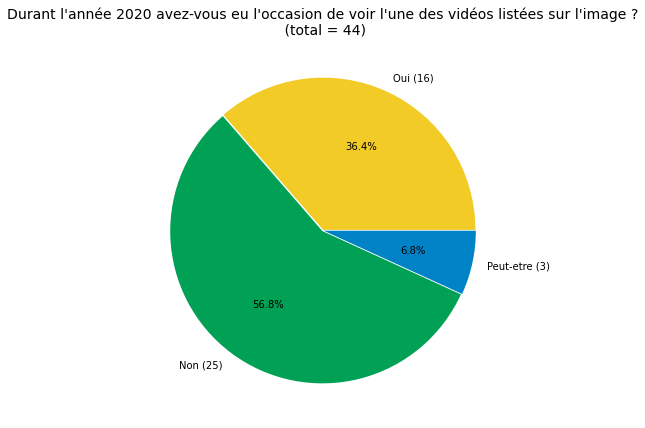

In [45]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_vidcul_2020, vidcul_2020_lbls, vidcul_2020_dtf = tfs.get_results(gidx=3, qid='SfiZNZEpZLSi')
myfig.plot_mbr_camembert(qtitle = q_vidcul_2020, list_labels = vidcul_2020_lbls, list_dtfs = vidcul_2020_dtf)

## Bilan : 

Les top vues de YouTube, parmi la soixantaine de chaines culturelles que j'ai requêtées, n'ont finalement pas été vues par la plupart des répondant.e.s.

Car lorsque les insitutions postent sur YouTube, elles sont face aux média (Konbini, Brut, France 2, Arte, etc.), aux YouTubeurs.euses (Norman, Scribe accroupi, Osons causer, etc.), aux artites (JuL, Booba, Dinos, PNL, Médine, etc.) et tous les autres organismes et particuliers qui peuvent poster sur la plateforme.

L'algorithme de promotion de YouTube, celui qui enchaîne les vidéos pour l'utilisateur, n'a que très peu de chance de donner de la visibilité à du contenu culturel, car ce dernier est noyé dans tout le reste.

En bref, l'institution culturelle ne gagne que peu de visibilité en étant présente sur les plateformes web grand public. Pour qu'un utilisateur de YouTube se voit proposé du contenu culturel, il faut qu'il ait déjà l'habitude d'en consommer. Mieux vaut être visible dans des médias (web, par exemple) pour bénéficier d'une plus grande allonge sur les publics.


## 4.C - Si non, pensez-vous en regarder-une ? 

- id = m3cIyvOrSQgC 
- single choice 

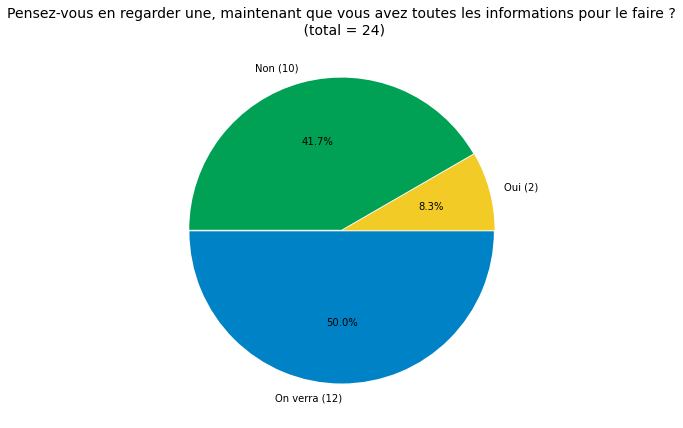

In [46]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_wanna_watch_video_cul, wanna_watch_video_cul_lbls, wanna_watch_video_cul_dtf = tfs.get_results(gidx=3, qid='m3cIyvOrSQgC')
myfig.plot_mbr_camembert(qtitle = q_wanna_watch_video_cul, list_labels = wanna_watch_video_cul_lbls, list_dtfs = wanna_watch_video_cul_dtf)

# Bilan :

Maintenant informés, 50% pourraient presque se laisser tenter pour en regarder une, et 8% s'engagent à le faire !

Sans plus de médiation, la simple communication du classement pourrait convertir plus de 50% du public éloigné en audience.

(La question suivante n'ayant été posée à personne, nous passerons directement à celle d'après)

## 4.E - Si vous avez vu une des vidéos précitées, vous souvenez-vous sur quelle plateforme c'était ? 

- id = VQ8iQTpII5iU 
- Multiple with other

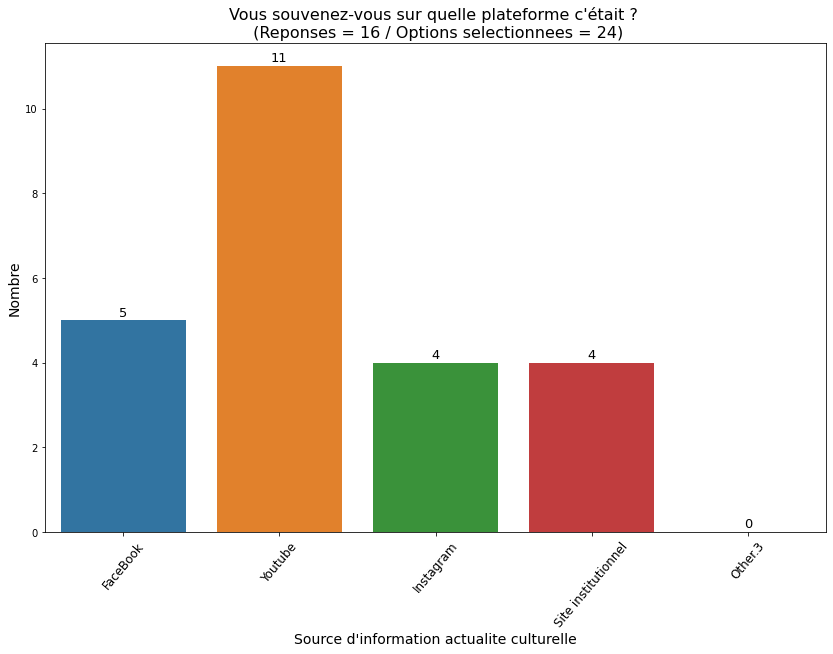

In [47]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_whichplattowatch, whichplattowatch_lbls, whichplattowatch_dtf = tfs.get_results(gidx=3, qid='VQ8iQTpII5iU')
# Renommage pour lisibilite
whichplattowatch_lbls[-2] = 'Site institutionnel'

nbrepondantes = vidcul_2020_dtf[0].shape[0]

myfig.plot_mbr_barchart(qtitle = q_whichplattowatch, list_labels = whichplattowatch_lbls, list_dfs = whichplattowatch_dtf, bar_xlabel = "Source d'information actualite culturelle", bar_ylabel = 'Nombre', nb_responses = nbrepondantes )

## Bilan :

La plupart des gens ont vu la vidéo sur YouTube. 

C'est normal, les insitutions utilisent plus souvent YouTube pour diffuser du contenu vidéo que leurs propres sites. 
Essayez par exemple de retrouver les top vues YouTube 2020 de l'INA sur le site de l'INA.


Exemple : Les français sont-ils racistes ? [->](https://www.ina.fr/recherche/search?search=les+fran%C3%A7ais+sont-il+racistes+%3F) 

## 4.F - Aviez vous un compte sur cette plateforme ?
- id = ExnuASVzZF96 
- Yes/No

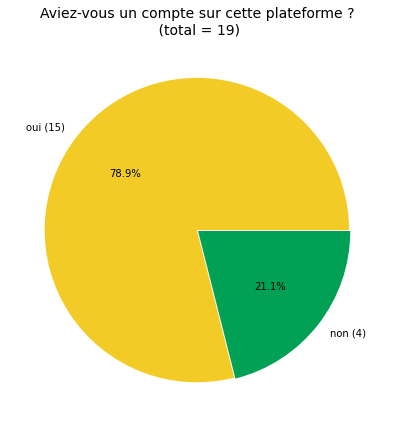

In [48]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_AviezVousUnCompte, AviezVousUnCompte_lbls, AviezVousUnCompte_dtf = tfs.get_results(gidx=3, qid='ExnuASVzZF96')
myfig.plot_mbr_camembert(qtitle = q_AviezVousUnCompte, list_labels = AviezVousUnCompte_lbls, list_dtfs = AviezVousUnCompte_dtf)

## Bilan :

21,4% des personnes qui ont visionné des vidéos institutionnelles ont été contraints de céder leurs données à caractère personnel à YouTube, et d'en subir les annonceurs pour regarder un contenu supposé public.

Pour les 79% restants, c'est tant mieux ! Maintenant que ce contenu est apparu dans votre historique, YouTube a plus de chances de vous proposer des vidéos d'institutions culturelles.

## 4.G - S'il existait un endroit sur Internet où trouver toutes les vidéos postées par les institutions culturelles (théâtre, spectacles vivants, sciences, séminaires, conférences, etc.), iriez-vous le consulter de temps en temps ? 

- id = I3G4Wsg6JAGd 
- Opinion scale

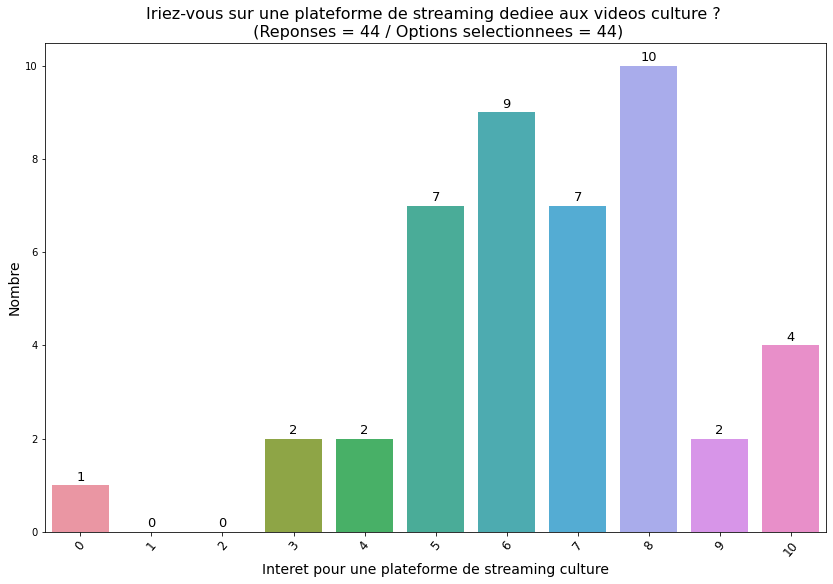

In [49]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_InteretPlat, InteretPlat_lbls, InteretPlat_dtfs = tfs.get_results(gidx=3, qid='I3G4Wsg6JAGd')
# Je reformule la question pour des raisons d'affichage sur le graphique
q_InteretPlat = "Iriez-vous sur une plateforme de streaming dediee aux videos culture ?"
# J'affiche sous forme de barres
myfig.plot_mbr_barchart(qtitle = q_InteretPlat, list_labels = InteretPlat_lbls, list_dfs = InteretPlat_dtfs, bar_xlabel = "Interet pour une plateforme de streaming culture", bar_ylabel = 'Nombre', nb_responses = nb_responses)

In [50]:
interetstream = mbrpl.moyenne_generale_note(liste_notes = InteretPlat_lbls, liste_dtfs = InteretPlat_dtfs, nbresp = nb_responses)

print("Interet moyen pour une plateforme de streaming culture : "+ str(interetstream))

Interet moyen pour une plateforme de streaming culture : 6.590909090909091


## Bilan :

C'est deja bon signe d'approcher une moyenne de 7.

Cela veut dire qu'avec une communication adaptée, on pourrait augmenter l'intérêt moyen pour tenter d'attirer celles et ceux qui le seraient le moins.

Peut-être que le simple fait de parler de l'enjeu de la plateforme (souveraineté des données, logiciel libre, écologie, etc.) pourrait suffir à augmenter un petit peu l'engouement pour celle-ci.

On va répartir les résultats en fonction du fait que les répondant.e.s avaient vu ou non une des top vidéos culture 2020 de YouTube. Cela permettra d'évaluer l'apport potentiel de vues que pourraient apporter la communication autour de notre plateforme aux insitutions culturelles.

In [51]:
# Croiser les résultats des deux questions
q_alreadyhooked, l_alreadyhooked_lbl, l__alreadyhooked_dtfs, q_interetstream, interetstream_lbls, interetstream_byapprentissage_dtfs = tfs.get_x_res(gidx1=3,qid1='SfiZNZEpZLSi', gidx2=3,qid2='I3G4Wsg6JAGd')

Durant l'année 2020 avez-vous eu l'occasion de voir l'une des vidéos listées sur l'image ?:
  ['Oui', 'Non', 'Peut-etre']
S'il existait un endroit sur Internet où trouver toutes les vidéos postées par les institutions culturelles (théâtre, spectacles vivants, sciences, séminaires, conférences, etc.), iriez-vous le consulter de temps en temps ?:
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


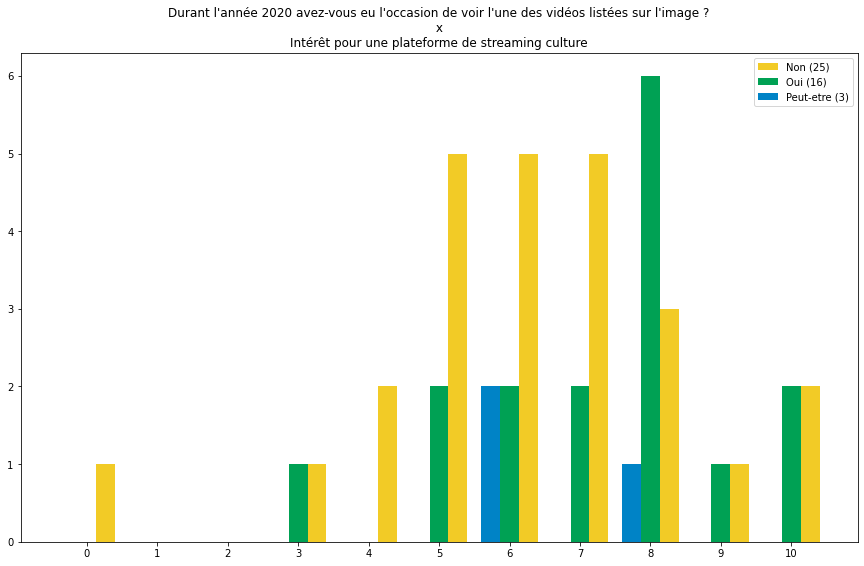

In [52]:
# Représenter les résultats sur un graph
cln_df_interet_byalreadyhooked = myfig.plot_mbr_multiple_bars(qtitle = q_alreadyhooked + "\n x \n" + "Intérêt pour une plateforme de streaming culture", xlist_labels = interetstream_lbls, legends = l_alreadyhooked_lbl, list_sub_dtfs = interetstream_byapprentissage_dtfs, bar_indxs = [0, 1, -1])

In [53]:
#Si on veut la moyenne générale de chaque catégorie : 
df_interetifalreadyhooked_moyennes = mbrpl.print_moyennes_xresults_mbarchart(df_xplot = cln_df_interet_byalreadyhooked, listofnotes = interetstream_lbls)

Moyenne 'Non' = 6.16
Moyenne 'Oui' = 7.25
Moyenne 'Peut-etre' = 6.666666666666667


On pourrait aussi vouloir faire la moyenne sur des top 15 pour comparer des dataset de mêmes tailles :


In [68]:
# Trier les résultats en mettant les meilleures notes d'intérêt en premier
resultats_tries = form_responses.sort_values(by = [q_interetstream], ascending=False)

# Récupérer les trois types de publics distincts, et ne prendre que le top 10 pour chaque
consommateurs_culture_actifs = resultats_tries[resultats_tries[q_alreadyhooked] == 'Oui'].head(15)
public_eloigne = resultats_tries[resultats_tries[q_alreadyhooked] == 'Non'].head(15)
proche_peripherie = resultats_tries[resultats_tries[q_alreadyhooked] == 'Peut-etre'].head(15)

# Obtenir la moyenne pour chacun des groupes ci-dessus :
moyenne_top10_consommateurs_actifs = consommateurs_culture_actifs[q_interetstream].mean()
moyenne_top10_public_eloigne = public_eloigne[q_interetstream].mean()
moyenne_top10_proche_peripherie = proche_peripherie[q_interetstream].mean()

# Afficher les différentes moyennes
print("Le top 15 des personnes ayant déjà vu les top vidéos 2020 éprouve un intérêt moyen de " + str(moyenne_top10_consommateurs_actifs))
print("Le top 15 des personnes n'ayant pas vu les top vidéos 2020 éprouve un intérêt moyen de " + str(moyenne_top10_public_eloigne))
print("Le top 15 des personnes ayant peut-être déjà vu les top vidéos 2020 éprouve un intérêt moyen de " + str(moyenne_top10_proche_peripherie))

Le top 15 des personnes ayant déjà vu les top vidéos 2020 éprouve un intérêt moyen de 7.533333333333333
Le top 15 des personnes n'ayant pas vu les top vidéos 2020 éprouve un intérêt moyen de 7.466666666666667
Le top 15 des personnes ayant peut-être déjà vu les top vidéos 2020 éprouve un intérêt moyen de 6.666666666666667


## Bilan :

Travailler sur le top 15 laisse penser qu'un public a priori éloigné du contenu vidéo des institutions culturelles pourrait être tenté de se rendre régulièrement sur une plateforme de streaming dédiée. Simplement parce qu'elle exitse et qu'il saurait qu'elle respecte ses droits comme son temps d'attention (qui est une valeur marchande pour la plupart des actuels acteurs privés)

## 4.H - Avez-vous pris part à des activités numériques organisées par le service public depuis le confinement v1 ? 

- id = VK6kxx4uSZjR 
- Single choice

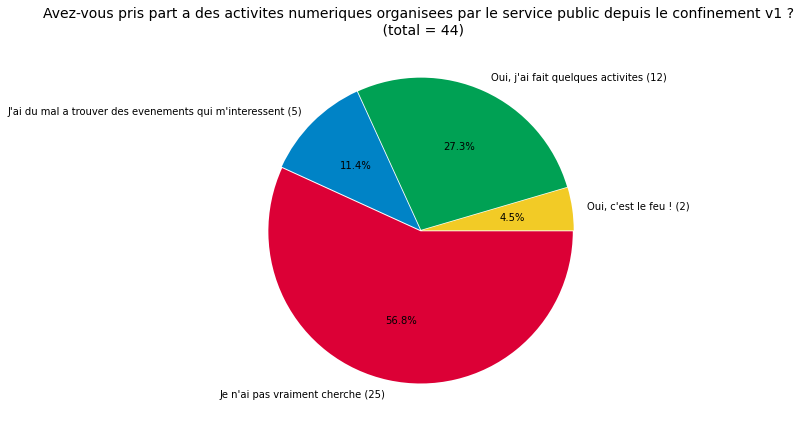

In [55]:
groupidx = 3
qidq = 'VK6kxx4uSZjR'


# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_ActivitesNum, ActivitesNum_lbls, ActivitesNum_dtfs = tfs.get_results(gidx=groupidx, qid=qidq)
# Modification du titre de la question pour des questions d'affichage :
q_ActivitesNum = 'Avez-vous pris part a des activites numeriques organisees par le service public depuis le confinement v1 ? '
ActivitesNum_lbls = ["Oui, c'est le feu !", "Oui, j'ai fait quelques activites", "J'ai du mal a trouver des evenements qui m'interessent", "Je n'ai pas vraiment cherche"]

myfig.plot_mbr_camembert(qtitle = q_ActivitesNum, list_labels = ActivitesNum_lbls, list_dtfs = ActivitesNum_dtfs)

## Bilan :

La plupart des répondat.e.s n'a pas vraiment cherché. Est-ce parce que les activités concernées ne bénéficient pas d'assez de popularité, ou est-ce parce que les gens ont d'autres choses à faire ? Difficile de savoir.

Cependant, ce résultat corrobore les résultats concernant les sources d'information de l'actualité culturelle. Le public se tient principalement informé par les média ou le bouche à oreille, qui sont des pratiques plus passives qu'actives. Une pratique active est d'aller sur le site de l'institution dédiée pour regarder le programme ou d'aller sur des sites spécialisés dans la programmation culturelle (comme [Slash Paris](https://slash-paris.com/))

Si nous venions à créer un nouveau service public, sa promotion nécessiterait un fort investissement en relation public et communication, pour que des tiers populaires parlent de nous.

## 4.I - Parmi les institutions suivantes, sélectionnez celles que vous connaissez : 

- id = JN4TO5fjBNlJ 
- Multiple choice

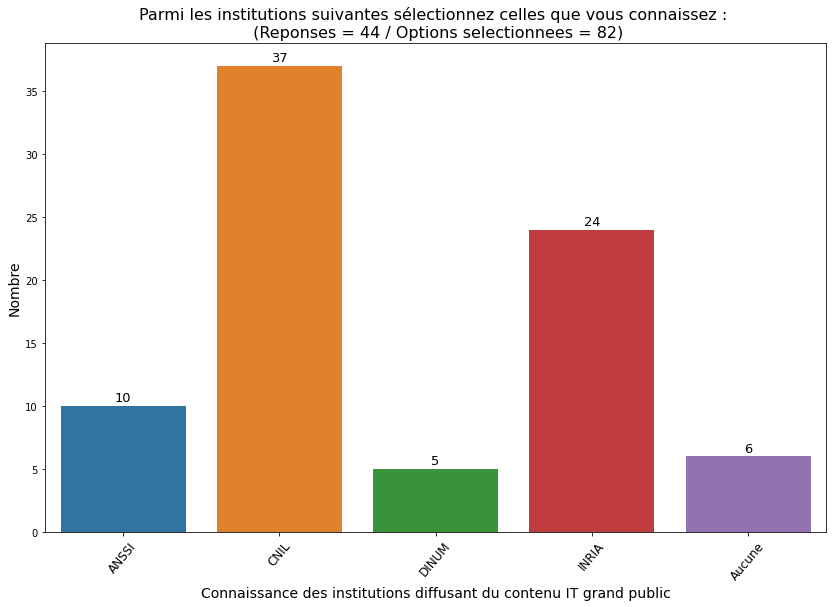

In [56]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_Instit_IT, Instit_IT_lbls, Instit_IT_dtfs = tfs.get_results(gidx=3, qid='JN4TO5fjBNlJ')
#Affiche sous forme de barres les résultats
myfig.plot_mbr_barchart(qtitle = q_Instit_IT, list_labels = Instit_IT_lbls, list_dfs = Instit_IT_dtfs, bar_xlabel = "Connaissance des institutions diffusant du contenu IT grand public", bar_ylabel = 'Nombre', nb_responses = nb_responses)

## Bilan

68% des francais disent connaitre la CNIL selon [ce cahier innovation et prospection](https://www.cnil.fr/sites/default/files/atoms/files/cnil_cahier_ip8.pdf).
Dans notre cas, on est a 84%.

Bravo a vous !


La CNIL bénéficie depuis trois ans, à juste titre, d'énormement de visibilité, notamment depuis la mise en application du RGPD, en 2018.

L'INRIA est l'acteur historique et de référence de l'informatique en France. Sa recherche a un rayonnement mondial.

L'ANSSI, l'agence Nationale des sécurité des systèmes d'information, produit aussi du contenu de qualité pour le grand public mais reste évidemment moins populaire que la CNIL ou l'INRIA.

La DINUM, même si elle produit aussi du contenu qui pourrait servir à tous et toutes, travaille essentiellement à la modernisation des services de l'Etat et sa popularité aura tendance à croitre dans le service public, avant de se développer dans le grand public.

-------------------------------------------------------------------------

# GROUP 5 : Les sujets qui vous interessent

-------------------------------------------------------------------------

## 5.A - Parmi les principes suivants, lesquels pensez-vous que l'Etat devrait systématiquement appliquer pour les services numériques qu'il développe ? 

- id = 0UMC41abtPgm 
- Multiple choice with other

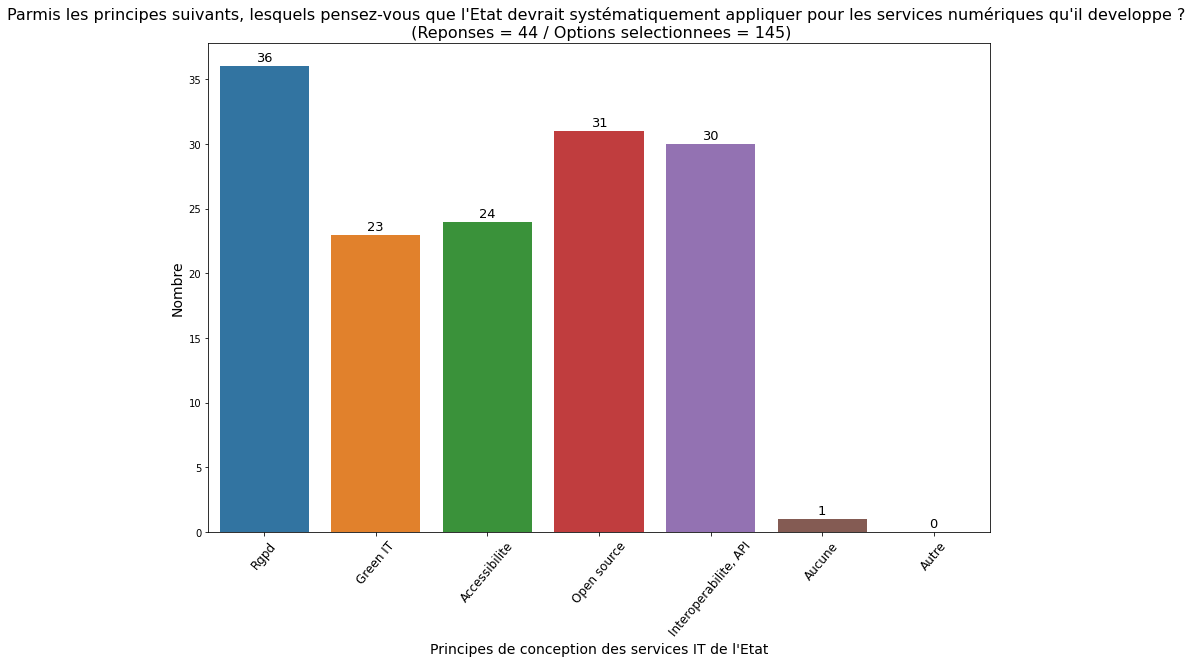

In [57]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_principes_govIT, principes_govIT_lbls, principes_govIT_dtfs = tfs.get_results(gidx=4, qid='0UMC41abtPgm')
# Modifier les labels pour lisibilite
principes_govIT_lbls = ['Rgpd', 'Green IT', 'Accessibilite', 'Open source', 'Interoperabilite, API', 'Aucune', 'Autre']
# Représenter le graphique en barres
myfig.plot_mbr_barchart(qtitle = q_principes_govIT, list_labels = principes_govIT_lbls, list_dfs = principes_govIT_dtfs, bar_xlabel = "Principes de conception des services IT de l'Etat", bar_ylabel = 'Nombre', nb_responses = nb_responses)

## Bilan :

La protection des données à caractère personnel est l'enjeu du moment. 82% d'entre vous pensent qu'il est nécessaire que les services de l'état respecte le _Privacy by design_.

Vient ensuite le monde du libre, l'open source. Le développement de ce type de dynamique facilite effectivement l'accès à la connaissance et peut s'intégrer à des démarches plus sociales et solidaires : par définition, le logiciel libre est accessible par tous, gratuitement. Contrairement aux suites _Microsoft Office_, par exemple, pour lesquelles il faut payer une licence. Le soutien de ces initiatives par l'Etat pourrait assurer leur pérénité et l'amélioration de leur qualité. Car beaucoup des organismes qui les développent aujourd'hui sont bénévoles et subissent parfois l'érosion du temps.

L'intéropérabilité apparait comme le troisième enjeu. Cela ne nécessite pas plus d'explications, on connaît tous notre lourdeur administrative.

Enfin, viennent l'éco-conception et l'accessibilité. J'imagine cependant que l'accessibilité pourrait bénéficier d'un intérêt plus fort, si on communiquait plus autour des démarches numériques associées. On a beaucoup entendu parler du RGPD quand il fut mis en application, mais très peu du [RGAA](https://www.numerique.gouv.fr/publications/rgaa-accessibilite/). Mais c'est vrai qu'il ne touche hélas directement que les administrations.

## 5.B - Les sujets de transformation de la société par le numérique vous intéressent-ils ?

- id = UUHA1PBnrPOH 
- Opinion scale

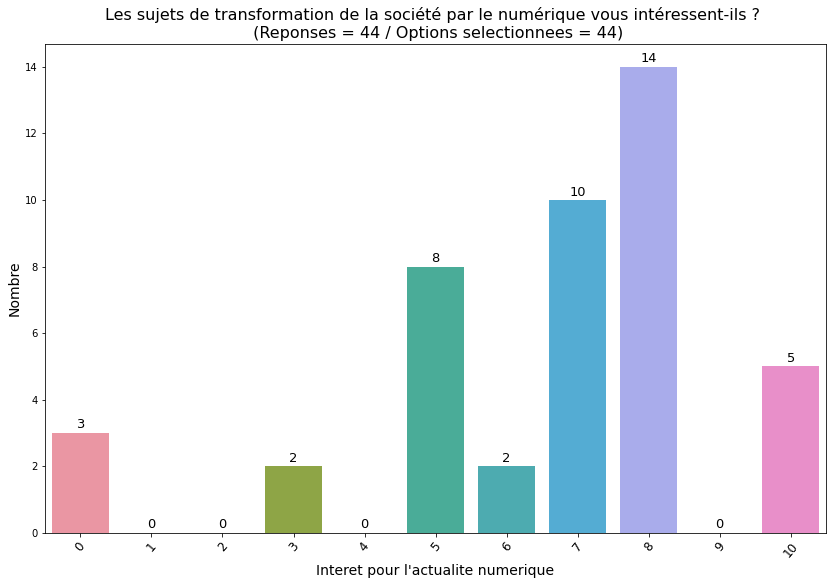

In [58]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_interetIT, interetIT_lbls, interetIT_dtfs = tfs.get_results(gidx=4,qid='UUHA1PBnrPOH')
# Afficher sous forme de barres
myfig.plot_mbr_barchart(qtitle = q_interetIT, list_labels = interetIT_lbls, list_dfs = interetIT_dtfs, bar_xlabel = "Interet pour l'actualite numerique", bar_ylabel = 'Nombre', nb_responses = nb_responses)

In [59]:
interetsitnews = mbrpl.moyenne_generale_note(liste_notes = interetIT_lbls, liste_dtfs = interetIT_dtfs, nbresp = nb_responses)

print("Interet l'actualite numerique : "+ str(interetsitnews))

Interet l'actualite numerique : 6.590909090909091


## Bilan :

Un intérêt mitigé pour les sujets d'informatique. Mais il existe des approches qui peuvent permettre de rendre un domaine plus attirant qu'il n'y paraitrait autrement.

## 5.C - Lesquels plus particulièrement...

- id = JYDLq41DRqDO 
- Multiple choice

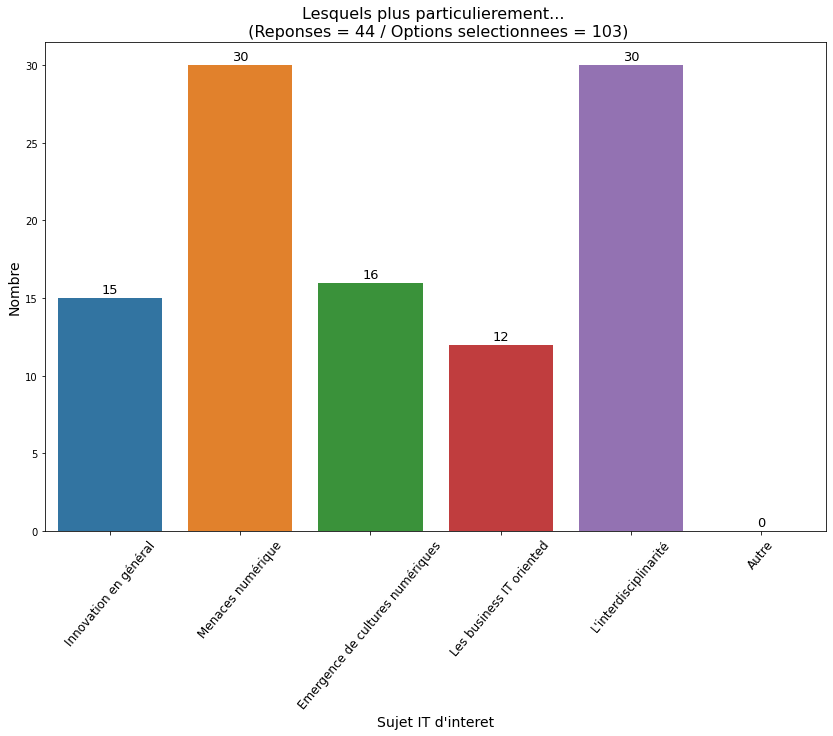

In [60]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_interets_news, interets_news_lbls, interets_news_dtfs = tfs.get_results(gidx=4,qid='JYDLq41DRqDO')
# Modifier les labels pour lisibilite
interets_news_lbls_short = ['Innovation en général', 'Menaces numérique', 'Emergence de cultures numériques', 'Les business IT oriented', "L'interdisciplinarité", 'Autre']
# Plotter le barchart
myfig.plot_mbr_barchart(qtitle = q_interets_news, list_labels = interets_news_lbls_short, list_dfs = interets_news_dtfs, bar_xlabel = "Sujet IT d'interet", bar_ylabel = 'Nombre', nb_responses = nb_responses, fresh_lbls = interets_news_lbls_short)

## Bilan :

Depuis la publication du Rgpd et les différents scandales liés à l'exploitation de nos données personnelles par des acteurs privées, le grand public est de plus en plus sensibilisé aux risques induits par des usages numériques qui nous semblaient normaux.

Par ailleurs, la distanciation sociale induite par la covid a entraîné une numérisation forcée de nos communications, qu'elles soient professionnelles ou personnelles (on fait plus de visio).  Avec ce développement des usages, on a aussi vu une augmentation des attaques informatiques qui font aujourd'hui plus souvent la une des médias.

Enfin, même l'actualité politique et la loi sécurité globale posent la question du traitement automatisé des images des personnes.

Les menaces numériques sont donc d'actualité.

De ces résultats, on pourrait aussi essayer de dégager une ligne éditoriale pour des contenus de médiation. En effet, l'informatique est une science applicable à tous les autres domaines de la connaissance : elle formalise une approche automatisable pour résoudre des problèmes dont l'échelle dépasserait le réalisme matériel. En clair, grâce à l'informatique, on peut simuler. On crée un modèle censé représenter un phénomène pour pouvoir tester des hypothèses. On se détache du poids de la matière pour accélérer le temps ou revenir en arrière. Sauvegarder, tester, rater, charger, ré-essayer, sans coûts additionnels théoriques. Imaginez qu'on n'ait pas d'architectes pour concevoir les bâtiments, que chacun se lance dans la construction sans avoir essayé de représenter au préalable ce qu'il comptait faire. Et bien l'informatisation d'un domaine de recherche crée le travail d'architecte de l'information.

On pourrait donc essayer de rendre l'informatique intéressant en l'abordant par des détours dans d'autres domaines. Quelle révolution d'échelle l'informatique a-t-elle permis dans les autres domaines ? Qu'ont permis de découvrir les simulations réalisées par l'immatérielle science de l'information ?

## 5.D - Aujourd'hui comment vous tenez-vous informé.e.s des innovations ou des actualités liées au numérique ? 

- id = 6MdurgsnsBfD 
- Multiple choice

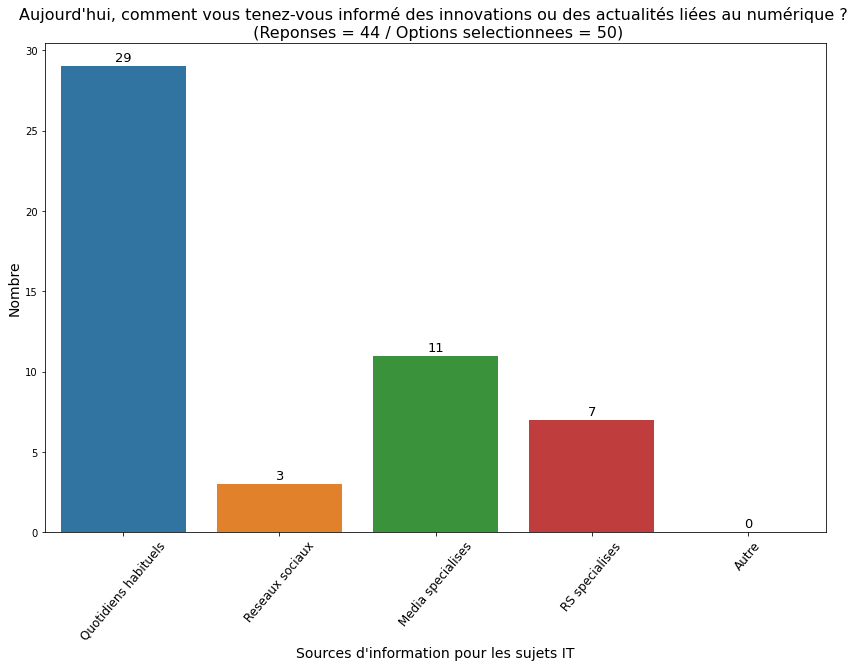

In [61]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_howdoyounewsIT, howdoyounewsIT_lbls, howdoyounewsIT_dtfs = tfs.get_results(gidx=4,qid='6MdurgsnsBfD')

# Modifier les labels pour lisibilite
howdoyounewsIT_lbls = ['Quotidiens habituels', 'Reseaux sociaux', 'Media specialises', 'RS specialises', 'Autre']

# Plotter le barchart
myfig.plot_mbr_barchart(qtitle = q_howdoyounewsIT, list_labels = howdoyounewsIT_lbls, list_dfs = howdoyounewsIT_dtfs, bar_xlabel = "Sources d'information pour les sujets IT", bar_ylabel = 'Nombre', nb_responses = nb_responses)

## Bilan :

La plupart d'entre-nous se contente de lire des articles dans les média habituels.

Peut-être une approche pourrait-elle être que certaines de nos publications apparaîssent aussi dans certains médias partenaires pour bénéficier d'une part de leur rayonnement. Peut-être faudrait-il proposer des formes de partenariat pour les accompagner, s'ils le souhaitent, dans l'exploration de certains sujets informatiques. On pourrait proposer des relectures par des sachants du domaine (qu'ils soient internes ou employés d'un partenaire, on met en relation, tant que notre nom apparaît sur les articles publiés)

------------------------------------------------------------------------------------------------

# GROUP 6 : Pour conclure

------------------------------------------------------------------------------------------------

## 6.A - Avez-vous déjà entendu parler d'un musée des sciences de l'infromation ? 

- id = t656hX85mrxs 
- multiple_choice

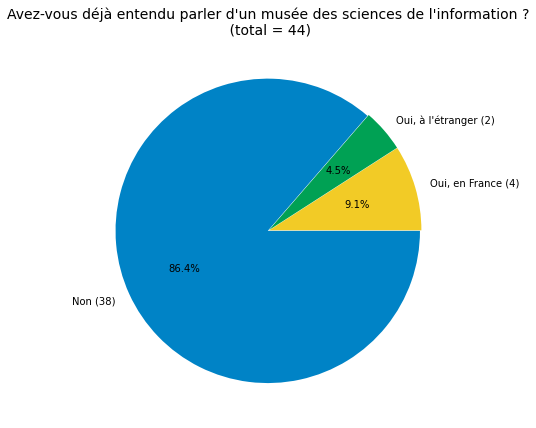

In [62]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_doyouknoITmuseum, doyouknoITmuseum_lbls, doyouknoITmuseum_dtfs = tfs.get_results(gidx=5,qid='t656hX85mrxs')
myfig.plot_mbr_camembert(qtitle = q_doyouknoITmuseum, list_labels = doyouknoITmuseum_lbls, list_dtfs = doyouknoITmuseum_dtfs)

## 6.B Pour ceux qui ont répondu "Oui, ...", pourriez-vous m'indiquer son nom ? 

- id = pfpA6xbQM1dT 
- long text

Retourne les dix premiers noms qu'il trouve

In [63]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_gibmename, gibmename_lbls, gibmename_dtfs = tfs.get_results(gidx=5,qid='pfpA6xbQM1dT')
gibmename_dtfs[0][q_gibmename].head(10)

2        C'est celui de Massimuccio.
7                      Le tien fraté
8                                chm
29                               MO5
31                  C'est aux States
37    Musée de Cannes d'Informatique
Name: Super ! Pourriez-vous m'indiquer son nom ?, dtype: object

## Bilan :

Il en existe effectivement un aux Etats-Unis. Le CHM, [Computer Hitory Museum](https://computerhistory.org/), la référence.

[Wikipedia](https://en.wikipedia.org/wiki/List_of_computer_museums) en liste tout un tas, dans de nombreux pays différents.

En France, il n'y en a pas cependant. Il y a beaucoup d'initiatives éclatées un peu partout : des associations comme [l'Aconit](https://www.aconit.org/spip/) ou le [MO5](https://mo5.com/site/) ; des collections privées d'industriels (BNP, Bull, etc.) ; des collections privées de particuliers ; etc. 

_Note :_ Je vous invite à acheter le [CILAC #73](https://www.cilac.com/numero-73-patrimoine-industriel-informatique) si vous souhaitez plus d'informations à ce sujet. Le PDF est en accès libre et gratuit, si vous le souhaitez. Mais si vous commandez le magazine papier, qui est de très bonne facture, vous financerez une association de passionné.e.s de patrimoine industriel.

Le projet que j'aimerais monter ne serait pas, en tout cas au début, un musée physique. Il serait seulement une plateforme web qui permettrait de référencer le patrimoine culturelle informatique dont la France dispose, mais qui est éparpillé dans différents organismes. Ceci est certainement un effet de bord de la difficulté qu'a l'informatique à s'institutionnaliser en France. Ce domaine scientifique souffrait tellement d'une mauvaise réputation (on s'imaginait l'ingénieur informaticient comme [Didier Super nous le chantait](https://www.youtube.com/watch?v=rlarCLhzfoU)) qu'on a ressenti le besoin de le _rebrander_ en "numérique"... 



## 6.C - Pensez-vous que ce serait une bonne chose d'en avoir un ? 

- id = bs6B4DKzBtxP 
- rating

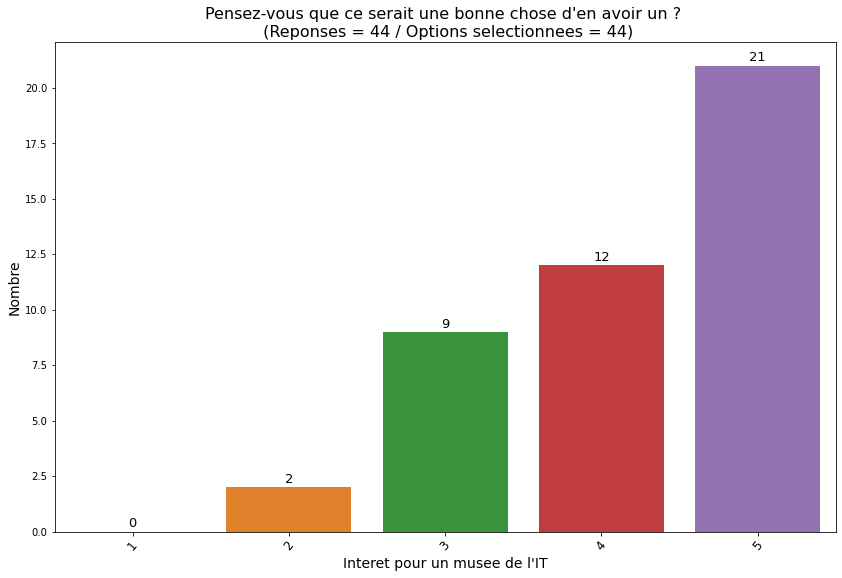

In [64]:
groupidx = 5
qidq = 'bs6B4DKzBtxP'


# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_ratingITmuseum, ratingITmuseum_notes, ratingITmuseum_dtf = tfs.get_results(gidx=groupidx, qid=qidq)
# Plotter le barchart
myfig.plot_mbr_barchart(qtitle = q_ratingITmuseum, list_labels = ratingITmuseum_notes, list_dfs = ratingITmuseum_dtf, bar_xlabel = "Interet pour un musee de l'IT", bar_ylabel = 'Nombre', nb_responses = nb_responses)

### Recuperer la moyenne generale sur 5

In [65]:
noteTotale = 0
for i in range(len(ratingITmuseum_notes)) :
    noteTotale += ratingITmuseum_dtf[i].shape[0]*ratingITmuseum_notes[i]

moyenne_interetMusee = noteTotale / nb_responses

print('Moyenne interet Musee : ' + str(moyenne_interetMusee) )

Moyenne interet Musee : 4.181818181818182


## Bilan : 

C'est très positif !

Par contre, je ne vous avais pas dit jusqu'à maintenant que je ne l'imaginais pas physique ou localisé, mais plutot virtuel en accès universel. Cela n'empêcherait pas d'organiser des événements physiques chez des partenaires. Cela n'empêcherait pas non plus de commencer à indexer le patrimoine immatériel : lister où se trouve quel objet, quel logiciel, quel code source, quel manuel utilisateur, quel article de référence, etc.

« La connaissance du patrimoine repose avant tout sur une démarche d’identification ; c’est-à-dire d’abord nommer, mais aussi classer et organiser. » Jean Davoigneau, chargé du patrimoine scientifique et technique au Ministère de la culture, CILAC #73. 

L'ambition de cette plateforme web serait de commencer par canaliser le trafic produit par les insitutions culturelles, via, par exemple, une plateforme de streaming dédiée, que l'on viendrait alimenter petit à petit avec du contenu produit par les intitutions "d'informatique" (ou par nous-mêmes). Petit à petit, les contenus de culture informatique française bénéficieraient du trafic généré par les autres institutions culturelles. 

A terme, cette plateforme pourrait centraliser la culture informatique produit dans les différents organismes pour faciliter l'accès du grand public. De la même manière qu'avec les services informatiques, on s'adresse à une _hotline_ pour toutes nos questions, le citoyen saurait que s'il cherche du contenu culturel informatique grand public, il peut se rendre sur notre site, qui référence les contenus qui lui sont dédiés sans qu'il ait à retenir le nom de toutes les institutions, ou de toutes les associations, qui parlent de ce sujet.

## 6.E - Quel type de structure serait le plus approprié ? 

- id = kMJmPLtGWg8U 
- Single choice

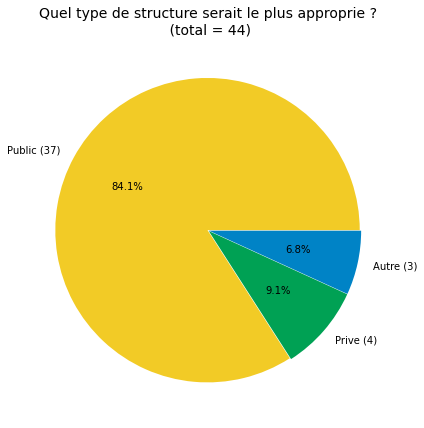

In [66]:
groupidx = 5
qidq = 'kMJmPLtGWg8U'


# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_publicouprive, publicouprive_lbls, publicouprive_dtf = tfs.get_results(gidx=groupidx, qid=qidq)
# Modification du titre et des labels pour affichage
q_publicouprive = 'Quel type de structure serait le plus approprie ?'
new_lbl = ['Public', 'Prive', 'Autre']

# Plot camembert
myfig.plot_mbr_camembert(qtitle = q_publicouprive, list_labels = publicouprive_lbls, list_dtfs = publicouprive_dtf, fresh_lbls=new_lbl)

### Afficher quelques 'Autres'

In [67]:
publicouprive_dtf[-1][publicouprive_lbls[-1]].head(10)

21                                     Un mix des deux?
33                                              une DSP
34    Financé par ceux qui créer l'information. Sous...
Name: Other.7, dtype: object

## Bilan :

Effectivement le rôle d'ouverture d'un domaine de la culture au grand public tient de l'institution public, d'institutions spécialisée dans la médiation et la recherche associée, c'est-à-dire des musées ou des centres culturels.

Les organismes privés spécialisés dans la médiation sont évidemment les médias. Ce qui finalement pourrait aussi être une alternative.

La DSP, [Délégation de service public](https://fr.wikipedia.org/wiki/D%C3%A9l%C3%A9gation_de_service_public) est une excellente idée aussi. Merci à celui ou celle qui l'a donné !

# Conclusion

La plus grande partie de la population active française n'a pas reçu d'éducation informatique de base (binaire, algorithmie, logique booléenne, etc.). Or, aujourd'hui, les répondants disposent en moyenne de 3 appareils informatiques par personne et sont confrontés au quotidien à des outils numériques.

Pour certain.e.s, cette pratique est presque forcée, limitant leur potentialité d'épanouissement dans le monde informatique pourtant indissociale du monde moderne.

L'intérêt d'un centre culturel informatique serait donc naturellement d'arriver en complément du système éducatif pour proposer des ateliers et formation, tant aux scolaires, que le programme actuel ne couvre pas encore (les 5 - 11 ans), qu'aux adultes plus éloignés de la discipline. Un centre culturel a vocation  à permettre la médiation d'une science ou d'un art pour offrir des fenêtres de découverte au grand public.

Le développement du web et de l'ensemble des services qui y affairent s'est fait à l'insu des individus, qui, aujourd'hui, ont l'impression de perdre la maîtrise de leurs informations personnelles. Si cette prise de conscience est salutaire, elle doit s'accompagner d'un travail de sensibilisation qui permette aux citoyens français de devenir des utilisateurs responsables (on peut décider d'enregistrer tous ses mots de passe dans son navigateur, tant qu'on le fait en pleine conscience des risques que cela induit et des alternatives que nous aurions pu choisir).

Certaines institutions, aujourd'hui, produisent des contenus de sensibilisation de qualité, mais le grand public ne suit pas souvent leur actualité et passe donc certainement à côté de ces riches enseignements. Après avoir passé plusieurs mois à étudier les acteurs du domaine, on peut facilement comprendre la difficulté du grand public : les sources d'information et de sensibilisation à l'informatique sont multiples, il n'existe pas une référence simple à l'aquelle on pourrait s'abonner et qui faciliterait l'accès à cette culture informatique.

Concernant l'actualité culturelle, les personnes qui ont répondu à ce questionnaire se tiennent généralement informées par les média traditionnels, reléguant au second plan l'importance d'une présence sur les réseaux sociaux habituels. En effet, ces réseaux ont tendance à conforter leur utilisateurs dans leurs goûts (le contenu proposé est censé nous plaire, pour que nous soyons tenté de cliquer). Lorsqu'une administration se crée un compte sur une de ces plateformes, ses contenus seront probablement proposés à des gens qui ont déjà exprimé de l'intérêt pour des contenus similaires. Lorsque l'enjeu des institutions culturelles doit être d'aller chercher des publics éloignés, alimenter un compte sur un réseau social ne semble pas la stratégie de communication la plus adaptée. Un partenariat avec un producteur de contenu qui disposerait déjà d'une audience considérée "éloignée" aurait plus d'impact. C'est en ça que les média traditionnels peuvent être de bons vecteurs de trafic, car ils s'adressent d'emblée à une audience plus large que les réseaux sociaux. Les algorithmes de ces derniers auront tendance à créer un effet tunnel qui n'apportera aux administrations que des visiteurs préalablement intéressés.

Face au bénéfice théorique modéré qu'ont les administrations à disposer d'un compte sur les plateformes sociales privées, on peut supposer qu'il est plus important de protéger les données personnelles des citoyens en leur proposant des plateformes de contenus qui respectent leurs données personnelles. Ce point est d'autant plus crucial à la vue de l'inquiétude exprimée par les répondant.e.s concernant les menaces numériques. 
La perte de visibilité potentielle des administrations qui arrêteraient de poster leurs vidéos sur YouTube pourrait être compensée par des stratégies de communication adaptée en partenariat avec des médias (web ou non). Ces derniers restent la source d'information principale du grand public en matière d'évenementiel culturel.

Enfin, si l'écosystème numérique cible, le centre culturel virtuel, voyait le jour et qu'il venait à produire ses propres contenus, la ligne éditoriale devrait en priorité aborder des sujets liés aux risques numériques ou aux applications variées de l'informatique aux autres domaines de la connaissance (spatial, santé, arts, médecine, etc.)

Si vous voulez lire des slides que j'ai fait pour présenter mon projet professionnel sur la base de l'ultime cours de Gérard Berry au Collège de France, c'est [ici ->](https://slides.com/massimobruni/projet-professionnel-f140f3/fullscreen?token=7uA1gByk)